# Post-Pandemic Air Passenger Travel Forecast
### Case Study: Air Passenger Traffic on LAX (California) –JFK (New York)  
This work has been submitted in partial fulfilment of the requirements of the Masters Degree in Urban Data Science and Analytics of the University of Leeds.  
- Date of submission: 23 January 2024
- Author: Subaru Shimizu
- Grade: 86/100  

**Disclaimer:**  
- This work is for educational and informational purposes only. The author makes no warranties or representations about the accuracy, reliability, or completeness of the code.
- The author does not take any responsibility for any direct, indirect, incidental, or consequential damages and losses from the use of the work.
- The work is not to be reused, modified, or redistributed without explicit permission from the author.

**Overview:**  
  
The COVID-19 pandemic has had a devastating impact on the aviation industry due to lockdowns and travel restrictions. This "new normal" has transformed our lifestyles and influenced travel demand. This study forecasts air travel demand in the post-pandemic era, where demand has become more volatile. Traditional forecasting methods, which do not account for unforeseeable shocks like the pandemic, are less effective. Therefore, this work employed a model that adapts to volatility and has successfully predicted air passenger traffic during the recovery phase.

***

## 1. Introduction and Background

The aviation industry is one of the most significant pillars in transporting people and goods in the United States. According to the Bureau of Transportation Statistics (2011), 82% of trips exceeding 1,500 miles are by air, while private transport is commonly used for short-distance trips. Especially the air routes connecting major cities on the East Coast and the West Coast have served the active business travel demand for years and contributed to the strong economic growth of the country. However, the COVID-19 pandemic in 2020 has had a devastating impact on the aviation industry due to lockdowns and travel restrictions. Such circumstances have proven the higher need for more precise and adaptable forecasting for air travel demand.  

***

## 2. Background and Literature

International Civil Aviation Organization (ICAO) (no date) considers air travel a derived demand, which means travel is generated as a consequence of the demand for something else. Forecasting air travel demand is challenging due to its volatile nature. Air travel demand is influenced by various external factors such as economic status, demographic situation, air ticket prices associated with jet fuel prices, the competitiveness of alternate transport modes, business events and holidays, maturity of the market, and policies and deregulations. Furthermore, the air travel demand is more likely to be influenced by unpredictable circumstances such as the September 11 attacks in 2011, the SARS pandemic in 2003, and the COVID-19 pandemic in 2020.

The COVID-19 pandemic has brought unprecedented repercussions on our economic activities and social mobility. Most states in the United States issued travel restrictions in March 2020 and lifted them in the following months. The pandemic impacted the U.S. economy significantly. U.S. GDP saw a historic drop of 8.9% in the second quarter of 2020, the largest contraction in a single quarter in more than 70 years (The White House, 2022). Following the depression of the economy and the travel restrictions, aviation in some European countries observed a more than 90% decline in the number of flights (International Energy Agency, 2020).  

After the COVID-19 pandemic, the air travel demand forecast has become more and more complex and volatile. The traditional forecasting methods commonly adopt macro and micro factors, which assume stable socio-economic systems and do not take unforeseeable shocks such as the pandemic into consideration (Truong, 2021). As of 2024, while the aviation industry is currently experiencing the recovery phase from the historic drop, it is not foreseeable how the global demand will recover and grow over the pre-pandemic level. International Air Transport Association (IATA) (2023) asserts that the air travel demand in the North American region will recover to the pre-pandemic level by 2023 and expand further. The global demand is predicted to grow annually by 4.2%. However, the conflicts in Ukraine and Gaza may bring uncertainty and instability again across the globe, which can affect the demand for air travel. For these reasons, it is essential to identify and develop a forecasting model which is adaptive to such uncertainty.



***

## 3. Research Question

The research questions of this project are as follows:  
- How does the air travel demand transition in the recovery phase from the pandemic?  
- Which model can forecast the demand more precisely after the pandemic?  

To answer these questions, this case study investigates the domestic air route between the Los Angeles International Airport (LAX) and the John F. Kennedy International Airport (JFK). Due to the uncertainty caused by the pandemic, the time series analysis approaches were mainly employed.


***

## 4. Data

### 4-1. Main Dataset: Monthly air passenger records

The air carrier statistics published by the Bureau of Transportation Statistics, United States, is the domestic airline market data. From the statistics, this project used the data table “T-100 Domestic Market (All Carriers)”, which contains monthly records reported by Certified air carriers, such as the number of passengers by origin and destination airports. As the dataset covers all passengers transported by large Certified air carriers, it is frequently used for analysing air traffic patterns by the industry.  

The dataset was downloaded through the website of the Bureau of Transportation Statistics as CSV files separated by year. The downloaded files were once loaded in the code and concatenated as one data frame. The data used for the project covers ten years and ten months, from 2013 to October 2023.


Columns in the dataset are summarised in the table below (Columns used for analysis only) .

|Column|Description|Unit|
|:--|:--|:--|
| PASSENGERS | No of passengers enplaned | persons |
| DISTANCE | Distance between origin and destination | miles |
| UNIQUE_CARRIER | Unique carrier code | N/A |
| UNIQUE_CARRIER_NAME | Unique Carrier name | N/A |
| ORIGIN_AIRPORT_ID | Origin Airport ID | N/A |
| ORIGIN | Origin Airport | N/A |
| ORIGIN_STATE_NM | State name of origin airport | N/A |
| DEST_AIRPORT_ID | Destination airport ID | N/A |
| DEST | Destination Airport | N/A |
| DEST_STATE_NM | State name of destination airport | N/A |
| YEAR |  | N/A |
| QUARTER | Year | N/A |
| MONTH | Month | N/A |
| CLASS | Service Class | N/A |

<div style="text-align: right;">
(Bureau of Transportation Statistics, 2024)
</div>

Service Class are categorised into the following four groups.

|Code|Description|Used for analysis|
|:--:|:--:|:--:|
| F | Scheduled Passenger/ Cargo Service F | YES |
| G | Scheduled All Cargo Service G | NO |
| L | Non-Scheduled Civilian Passenger/ Cargo Service L | YES |
| P | Non-Scheduled Civilian All Cargo Service P | NO |

<div style="text-align: right;">
(Bureau of Transportation Statistics, 2024)
</div>

Source: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GED&QO_fu146_anzr=Nv4%20Pn44vr45

### 4-2. Sub Dataset 1: Airport attribute data

This dataset provides information on airports located in the United States and outside the United States. The dataset, published by the Bureau of Transportation Statistics, United States, was downloaded through their website as a CSV file.  
In this project, this dataset was used primarily to identify locations of concerned airports in the analysis and visualising their locations.

Columns in the dataset are summarised in the table below (Columns used for analysis only) .

|Column|Description|Unit|
|:--|:--|:--|
| AIRPORT_ID | Airport ID number | N/A |
| AIRPORT | Three character alpha-numeric code | N/A |
| DISPLAY_AIRPORT_NAME | Airport name | N/A |
| AIRPORT_STATE_NAME | State name of airport | N/A |
| LATITUDE | Latitude | N/A |
| LONGITUDE | Longitude | N/A |
| AIRPORT_IS_LATEST | 1= YES indicates the attributes are the latest | N/A |
| AIRPORT_IS_CLOSED | 1= YES indicates the airport is closed | N/A |


<div style="text-align: right;">
(Bureau of Transportation Statistics, 2024)
</div>

Source: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FLL&QO_fu146_anzr=N8vn6v10+f722146+gnoyr5

### 4-2. Sub Dataset 2: Domestic demand forecast (Annual growth rate)

This dataset provides information on the quarterly forecast of domestic demand, comprised of final consumption, investment and stock-building expenditures. This dataset gives insights into the domestic economic status.  
The dataset was downloaded through the OECD portal, selecting the United States data. The data used for analysis covers the first quarter of 2013 to the fourth quarter of 2025.

Columns in the dataset are summarised in the table below (Columns used for analysis only) .

|Column|Description|Unit|
|:--|:--|:--|
| TIME | Indicates the time of forecasted value | N/A |
| Value | Forecasted annual growth rate of domestic demand | % |

<div style="text-align: right;">
(Organisation for Economic Co-operation and Development (OECD), 2024)
</div>

Source: https://data.oecd.org/gdp/domestic-demand-forecast.htm#indicator-chart

***

## 5. Research Flow

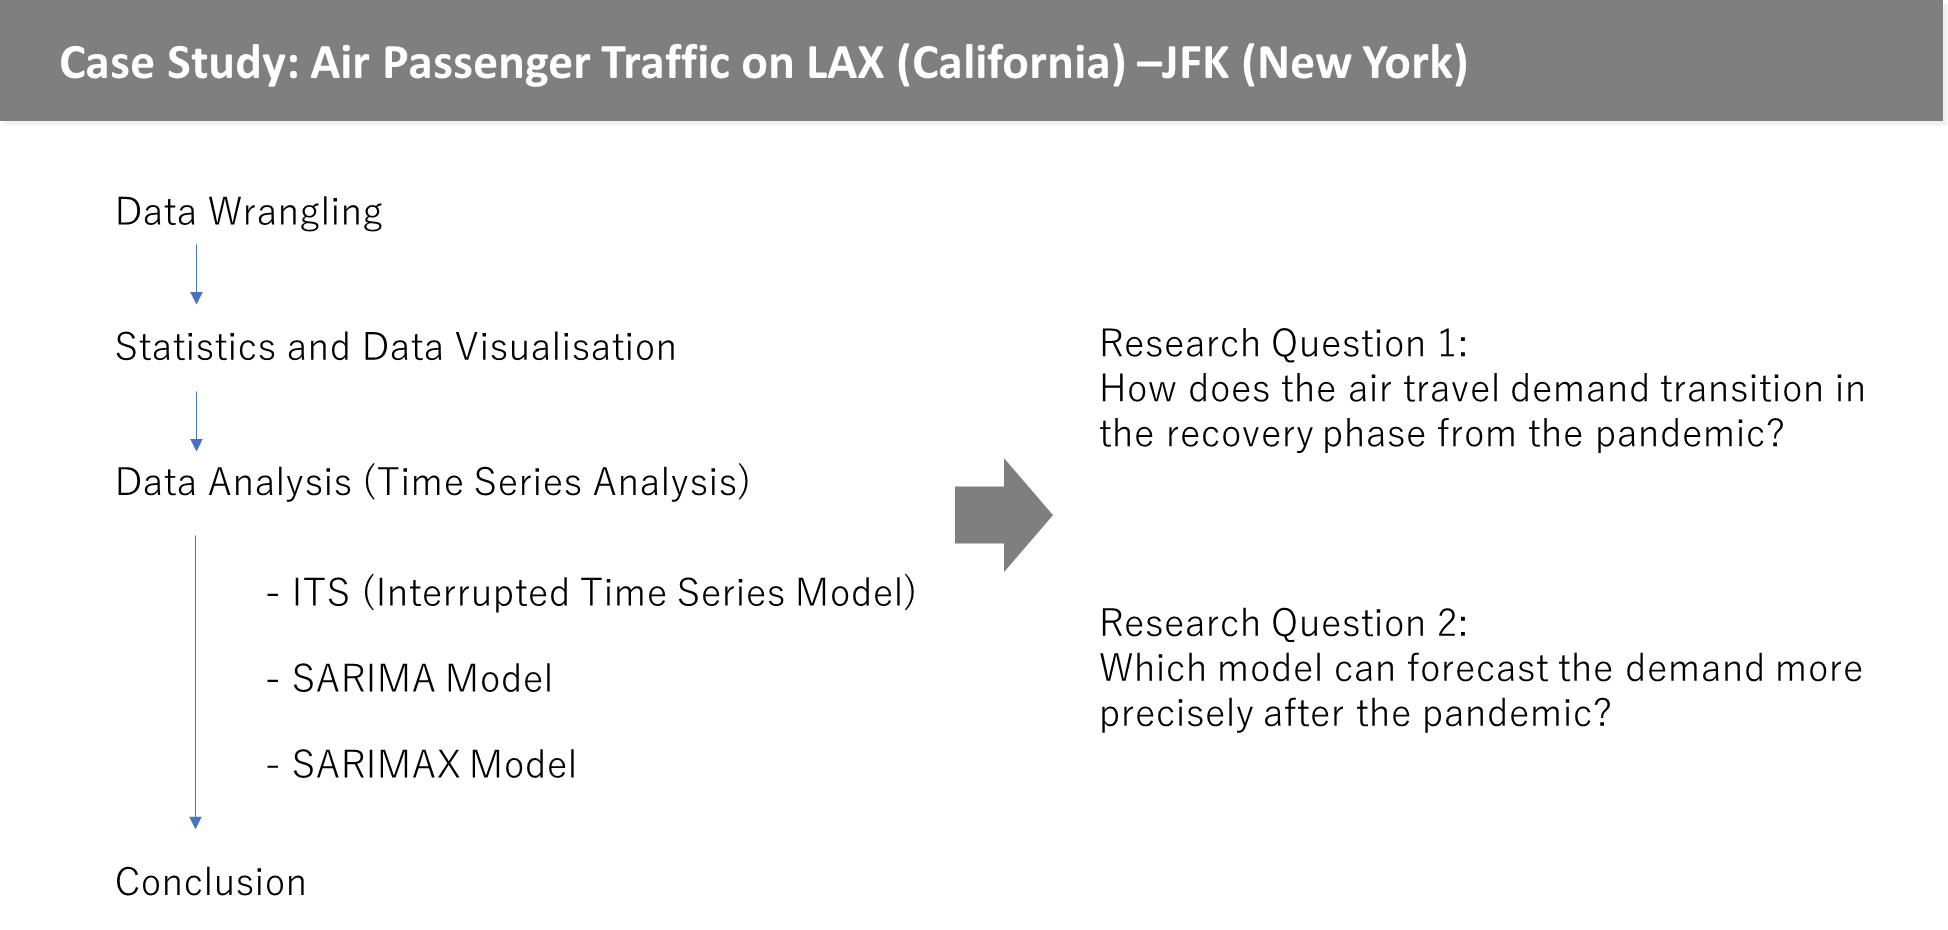

***

## 6. Data Wrangling

### 6-1. Import libraries

In [ ]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
palette = 'bwr' 
sns.set_palette(palette)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

from pysal.lib import weights
from pysal.lib import io

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### 6-2. Data Wrangling

Before reading the dataset files, make functions that are used frequently.  

Prepare a function for data type conversion.

In [2]:
#Data type converter: Convert the data types of given columns into the given data type.
def dtype_convert(df, columns, dtype):
    for column in columns:
        df[column] = df[column].astype(dtype)
    return df

Prepare a function for extracting necessary records for this project: records of air routes from/to Los Angeles International Airport (LAX) only. 

In [3]:
#Data filter: Filter necessary records that are used for the project.
##This filter selects records of routes of which origin or destination airport is LAX..
def filtering(df):
    #df_oLAX is a DataFrame which contains records of which origin airport is LAX. 
    df_oLAX = df[(df['ORIGIN'] == 'LAX')&(df['DEST'] != 'LAX')]
    #df_dLAX is a DataFrame which contains records of which destination airport is LAX.
    df_dLAX = df[(df['DEST'] == 'LAX')&(df['ORIGIN'] != 'LAX')]
    return df_oLAX, df_dLAX

#### 6-2-1. Main Dataset

Read the original data files (11 CSV files) stored in the directry and create DataFrames of each year.

__Note: The following 3 codes will not be used in the submitted file. This is because the original file size is too big for submission.__

In [4]:
# #Designate the path of the directry.
# path = 'C:/Users/subar/OneDrive - University of Leeds/Courses/Data Science/Project/Data/Market2'

# for root, dirs, files in os.walk(path):
#     #Obtain files of which name end with ".csv" under the designated path.
#     for file in files:
#         if file.endswith(".csv"):
#             full_path = os.path.join(root, file)
            
#             #Obtain the file name to use it for naming DataFrames.(e.g. "CARRIER_2013")
#             name = file.split('_')[-2] + '_' + file.split('_')[-1].split('.')[0]
#             print(name)
            
#             #Read the CSV files
#             ##Note: The main dataset files are separated by year.
#             read_csv = pd.read_csv(full_path, encoding='utf-8')
            
#             #Create DataFrames (two data frames per year) after filtering.
#             df_oLAX_csv, df_dLAX_csv = filtering(read_csv)
            
#             #This is for saving memory space.
#             del read_csv
            
#             #Name the DataFrame using the file name (e.g. "df_CARRIER_2023_dLAX, df_CARRIER_2023_oLAX")
#             globals()[f'df_{name}_oLAX'] = df_oLAX_csv
#             globals()[f'df_{name}_dLAX'] = df_dLAX_csv
#             del df_oLAX_csv, df_dLAX_csv

Concatenate all the files and create the master DataFrame (df_LAX).

In [5]:
# od_LAX = [df_CARRIER_2023_dLAX, df_CARRIER_2023_oLAX,
#           df_CARRIER_2022_dLAX, df_CARRIER_2022_oLAX,
#           df_CARRIER_2021_dLAX, df_CARRIER_2021_oLAX,
#           df_CARRIER_2020_dLAX, df_CARRIER_2020_oLAX,
#           df_CARRIER_2019_dLAX, df_CARRIER_2019_oLAX,
#           df_CARRIER_2018_dLAX, df_CARRIER_2018_oLAX,
#           df_CARRIER_2017_dLAX, df_CARRIER_2017_oLAX,
#           df_CARRIER_2016_dLAX, df_CARRIER_2016_oLAX,
#           df_CARRIER_2015_dLAX, df_CARRIER_2015_oLAX,
#           df_CARRIER_2014_dLAX, df_CARRIER_2014_oLAX,
#           df_CARRIER_2013_dLAX, df_CARRIER_2013_oLAX,
#          ]

# df_LAX = pd.concat(od_LAX, axis=0)
# #This is for saving memory space.
# del od_LAX

Export the DataFrame as a CSV file.

In [6]:
# df_LAX.to_csv("main_dataset.csv", index=False)

Read the exported CSV file.  
__Note: In the submitted file, the main dataset file will be read with the code below.__

In [7]:
df_LAX = pd.read_csv("main_dataset.csv")

See how the master DataFrame looks like.

In [ ]:
df_LAX

See what columns are included in the DataFrame and which data types they are.

In [9]:
df_LAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87510 entries, 0 to 87509
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PASSENGERS             87510 non-null  float64
 1   FREIGHT                87510 non-null  float64
 2   MAIL                   87510 non-null  float64
 3   DISTANCE               87510 non-null  float64
 4   UNIQUE_CARRIER         87504 non-null  object 
 5   AIRLINE_ID             87510 non-null  float64
 6   UNIQUE_CARRIER_NAME    87510 non-null  object 
 7   UNIQUE_CARRIER_ENTITY  87510 non-null  object 
 8   REGION                 87510 non-null  object 
 9   CARRIER                87504 non-null  object 
 10  CARRIER_NAME           87510 non-null  object 
 11  CARRIER_GROUP          87510 non-null  int64  
 12  CARRIER_GROUP_NEW      87510 non-null  float64
 13  ORIGIN_AIRPORT_ID      87510 non-null  int64  
 14  ORIGIN_AIRPORT_SEQ_ID  87510 non-null  int64  
 15  OR

Drop unnecessary columns.

In [10]:
#Drop unnecessary columns
Unused_cols1 = ['FREIGHT', 'MAIL', 'AIRLINE_ID', 'UNIQUE_CARRIER_ENTITY', 'REGION',
               'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_SEQ_ID',
               'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
               'ORIGIN_WAC', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_CITY_NAME',
               'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_WAC', 'DISTANCE_GROUP']
df_LAX.drop(columns =Unused_cols1, inplace=True)

Drop records of cargo flights using the `CLASS` column.

|Code|Description|Used for analysis|
|:--:|:--:|:--:|
| F | Scheduled Passenger/ Cargo Service F | YES |
| G | Scheduled All Cargo Service G | NO |
| L | Non-Scheduled Civilian Passenger/ Cargo Service L | YES |
| P | Non-Scheduled Civilian All Cargo Service P | NO |

In [11]:
#Check the number of records of each class.
df_LAX['CLASS'].value_counts()

CLASS
F    70706
L     8038
P     4770
G     3996
Name: count, dtype: int64

In [12]:
#Drop non-passenger flights (Cargo flights)
df_LAX = df_LAX[(df_LAX['CLASS']=='F')|(df_LAX['CLASS']=='L')]
df_LAX

PASSENGERS  DISTANCE UNIQUE_CARRIER  \
0             0.0      17.0            09Q   
1             0.0      17.0            09Q   
2             0.0      17.0            09Q   
3             0.0      17.0             LF   
4             0.0      18.0            3FQ   
...           ...       ...            ...   
87505     78467.0    1235.0             AA   
87506     78831.0    1235.0             AA   
87507     84983.0    1235.0             AA   
87508     87750.0    1235.0             AA   
87509     87858.0    1235.0             AA   

                                     UNIQUE_CARRIER_NAME  ORIGIN_AIRPORT_ID  \
0      Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...              12954   
1      Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...              12954   
2      Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...              12954   
3      CFM Inc d/b/a Contour Airlines d/b/a One Jet S...              12954   
4             Western Air Charter, Inc.  d/b/a  Jet Edge              10800   
...                                                  ...                ...   
87505                             American Airlines Inc.              12892   
87506                             American Airlines Inc.              12892   
87507                             American Airlines Inc.              12892   
87508                             American Airlines Inc.              12892   
87509                             American Airlines Inc.              12892   

      ORIGIN ORIGIN_STATE_NM  DEST_AIRPORT_ID DEST DEST_STATE_NM  YEAR  \
0        LGB      California            12892  LAX    California  2023   
1        LGB      California            12892  LAX    California  2023   
2        LGB      California            12892  LAX    California  2023   
3        LGB      California            12892  LAX    California  2023   
4        BUR      California            12892  LAX    California  2023   
...      ...             ...              ...  ...           ...   ...   
87505    LAX      California            11298  DFW         Texas  2013   
87506    LAX      California            11298  DFW         Texas  2013   
87507    LAX      California            11298  DFW         Texas  2013   
87508    LAX      California            11298  DFW         Texas  2013   
87509    LAX      California            11298  DFW         Texas  2013   

       QUARTER  MONTH CLASS  
0            3      8     L  
1            3      9     L  
2            4     10     L  
3            1      3     L  
4            2      5     L  
...        ...    ...   ...  
87505        2      5     F  
87506        2      4     F  
87507        2      6     F  
87508        3      8     F  
87509        3      7     F  

[78744 rows x 14 columns]

Check the null records. There are six rows that have null in `UNIQUE_CARRIER`.  
However, these are kept as they are as this column is not used for the analysis.

In [13]:
#Check null records.
df_LAX.isnull().sum()

PASSENGERS             0
DISTANCE               0
UNIQUE_CARRIER         6
UNIQUE_CARRIER_NAME    0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
ORIGIN_STATE_NM        0
DEST_AIRPORT_ID        0
DEST                   0
DEST_STATE_NM          0
YEAR                   0
QUARTER                0
MONTH                  0
CLASS                  0
dtype: int64

Adding columns necessary for the analysis

- `Route`: Describes the combination of origin and destination airports.  (e.g. "LAX-JFK")
- `Route_cat`: Describes the origin/destination airport to/from LAX. Pick up non-LAX airport out of origin/destination airports in the row. (e.g. "JFK" in case the origin is LAX and the destination is JFK.)
- `Period`: Describes the date of the record. Note that first date of a month is shown as the dataset is monthly collected.

In [14]:
def add_columns(df):
    #Add route column
    df['Route'] = df['ORIGIN'] + ' - ' + df['DEST']
    
    #Add route category column
    df['Route_cat'] = ''
    df.loc[df['ORIGIN']=='LAX', 'Route_cat'] = df.loc[df['ORIGIN'] == 'LAX', 'DEST']
    df.loc[df['DEST']=='LAX', 'Route_cat'] = df.loc[df['DEST'] == 'LAX', 'ORIGIN']

    #Add period column
    df['Period'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
    return df

In [ ]:
df_LAX = add_columns(df_LAX)
df_LAX

Check the unique value counts in every column.

In [16]:
for column in df_LAX.columns:
    value_counts_result = df_LAX[column].value_counts()
    print(f"=== Value Counts for　Column: '{column}' ===")
    print(value_counts_result)
    print("\n")

=== Value Counts for　Column: 'PASSENGERS' ===
PASSENGERS
0.0        2928
2.0         761
1.0         748
3.0         533
4.0         465
           ... 
29321.0       1
29425.0       1
29456.0       1
29533.0       1
87858.0       1
Name: count, Length: 21452, dtype: int64


=== Value Counts for　Column: 'DISTANCE' ===
DISTANCE
337.0     3078
236.0     2550
954.0     2095
862.0     1932
2218.0    1818
          ... 
1223.0       1
597.0        1
374.0        1
3450.0       1
2233.0       1
Name: count, Length: 383, dtype: int64


=== Value Counts for　Column: 'UNIQUE_CARRIER' ===
UNIQUE_CARRIER
WN        14852
DL         9601
OO         9423
UA         9274
AA         7284
NK         4215
G4         3392
CP (2)     3220
AS         2687
B6         2147
VX         1674
QX         1631
US          971
SY          934
HA          851
F9          783
09Q         674
27Q         620
3FQ         517
0WQ         455
MQ          444
ZK          396
YV          396
3EQ         256
5Y          229


Converte the data type using `dtype_convert` function defined above if inappropriate data type is used.

In [17]:
#Check the current data types.
df_LAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78744 entries, 0 to 87509
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PASSENGERS           78744 non-null  float64       
 1   DISTANCE             78744 non-null  float64       
 2   UNIQUE_CARRIER       78738 non-null  object        
 3   UNIQUE_CARRIER_NAME  78744 non-null  object        
 4   ORIGIN_AIRPORT_ID    78744 non-null  int64         
 5   ORIGIN               78744 non-null  object        
 6   ORIGIN_STATE_NM      78744 non-null  object        
 7   DEST_AIRPORT_ID      78744 non-null  int64         
 8   DEST                 78744 non-null  object        
 9   DEST_STATE_NM        78744 non-null  object        
 10  YEAR                 78744 non-null  int64         
 11  QUARTER              78744 non-null  int64         
 12  MONTH                78744 non-null  int64         
 13  CLASS                78744 non-null 

The columns describing "IDs" should be converted to object.  
The number of passengers should be described with integer.

In [18]:
#Convert the data types using the dtype_convert function.

#Columns to be converted to "object"
columns_convert1 = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']
to_dtype1 = 'object'
#Columns to be converted to "integer"
columns_convert2 = ['PASSENGERS']
to_dtype2 = 'int'

df_LAX = dtype_convert(df_LAX, columns_convert1, to_dtype1)
df_LAX = dtype_convert(df_LAX, columns_convert2, to_dtype2)
#Confirm that the data types have been successfully converted.
df_LAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78744 entries, 0 to 87509
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PASSENGERS           78744 non-null  int32         
 1   DISTANCE             78744 non-null  float64       
 2   UNIQUE_CARRIER       78738 non-null  object        
 3   UNIQUE_CARRIER_NAME  78744 non-null  object        
 4   ORIGIN_AIRPORT_ID    78744 non-null  object        
 5   ORIGIN               78744 non-null  object        
 6   ORIGIN_STATE_NM      78744 non-null  object        
 7   DEST_AIRPORT_ID      78744 non-null  object        
 8   DEST                 78744 non-null  object        
 9   DEST_STATE_NM        78744 non-null  object        
 10  YEAR                 78744 non-null  int64         
 11  QUARTER              78744 non-null  int64         
 12  MONTH                78744 non-null  int64         
 13  CLASS                78744 non-null 

#### 6-2-2. Sub Dataset 1 (Airport attributes)

Read the CSV file and create a DataFrame (dfs1).

In [19]:
#Read the sub dataset1 (Airport attributes)
dfs1 = pd.read_csv("T_MASTER_CORD.csv")
dfs1

AIRPORT_SEQ_ID  AIRPORT_ID AIRPORT        DISPLAY_AIRPORT_NAME  \
0             1000101       10001     01A        Afognak Lake Airport   
1             1000301       10003     03A     Bear Creek Mining Strip   
2             1000401       10004     04A             Lik Mining Camp   
3             1000501       10005     05A        Little Squaw Airport   
4             1000601       10006     06A                Kizhuyak Bay   
...               ...         ...     ...                         ...   
19145         1700301       17003     NRN                       Weeze   
19146         1700401       17004     OR5  Condon State Pauling Field   
19147         1700501       17005     UNU                Dodge County   
19148         1700601       17006     LBD             Khujand Airport   
19149         9999901       99999     ZZZ     Unknown Point in Alaska   

      DISPLAY_AIRPORT_CITY_NAME_FULL  AIRPORT_WAC_SEQ_ID2  AIRPORT_WAC  \
0                   Afognak Lake, AK                  101            1   
1               Granite Mountain, AK                  101            1   
2                            Lik, AK                  101            1   
3                   Little Squaw, AK                  101            1   
4                       Kizhuyak, AK                  101            1   
...                              ...                  ...          ...   
19145           Niederrhein, Germany                42902          429   
19146                     Condon, OR                 9201           92   
19147                     Juneau, WI                 4501           45   
19148            Khujand, Tajikistan                78301          783   
19149        Unknown Point in Alaska                  101            1   

      AIRPORT_COUNTRY_NAME AIRPORT_COUNTRY_CODE_ISO AIRPORT_STATE_NAME  \
0            United States                       US             Alaska   
1            United States                       US             Alaska   
2            United States                       US             Alaska   
3            United States                       US             Alaska   
4            United States                       US             Alaska   
...                    ...                      ...                ...   
19145              Germany                       DE                NaN   
19146        United States                       US             Oregon   
19147        United States                       US          Wisconsin   
19148           Tajikistan                       TJ                NaN   
19149        United States                       US             Alaska   

      AIRPORT_STATE_CODE  AIRPORT_STATE_FIPS  CITY_MARKET_SEQ_ID  \
0                     AK                 2.0             3000101   
1                     AK                 2.0             3000301   
2                     AK                 2.0             3000401   
3                     AK                 2.0             3000501   
4                     AK                 2.0             3000601   
...                  ...                 ...                 ...   
19145                NaN                 NaN             3695001   
19146                 OR                41.0             3695101   
19147                 WI                55.0             3695201   
19148                NaN                 NaN             3695301   
19149                 AK                 2.0             9999901   

       CITY_MARKET_ID DISPLAY_CITY_MARKET_NAME_FULL  CITY_MARKET_WAC_SEQ_ID2  \
0               30001              Afognak Lake, AK                      101   
1               30003          Granite Mountain, AK                      101   
2               30004                       Lik, AK                      101   
3               30005              Little Squaw, AK                      101   
4               30006                  Kizhuyak, AK                      101   
...               ...                           ...    

Drop unnecessary airport information.

In [ ]:
#Select the latest airport information only.
dfs1 = dfs1[dfs1['AIRPORT_IS_LATEST']==1]
#Drop the closed airports from the DataFrame.
dfs1 = dfs1[dfs1['AIRPORT_IS_CLOSED']==0]
dfs1

Check if there is no duplication in the "Airport" column.

In [ ]:
dfs1['AIRPORT'].value_counts()

Drop unnecessary columns.

In [ ]:
#Drop unnecessary columns
Used_cols2 = ['AIRPORT_ID','AIRPORT', 'DISPLAY_AIRPORT_NAME', 'AIRPORT_STATE_NAME', 'LATITUDE', 'LONGITUDE']
dfs1 = dfs1[Used_cols2]
dfs1

In [23]:
dfs1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6423 entries, 0 to 19149
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AIRPORT_ID            6423 non-null   int64  
 1   AIRPORT               6423 non-null   object 
 2   DISPLAY_AIRPORT_NAME  6423 non-null   object 
 3   AIRPORT_STATE_NAME    3135 non-null   object 
 4   LATITUDE              6422 non-null   float64
 5   LONGITUDE             6422 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 351.3+ KB


#### 6-2-3. Sub Dataset 2 (US Domestic demand forecast)

Read the CSV file and create a DataFrame (dfs2).

In [24]:
dfs2 = pd.read_csv("Domestic_demand_forecast.csv")
dfs2.head()

LOCATION        INDICATOR SUBJECT MEASURE FREQUENCY     TIME     Value  \
0      USA  DDEMANDFORECAST     TOT  AGRWTH         Q  2013-Q1  3.543825   
1      USA  DDEMANDFORECAST     TOT  AGRWTH         Q  2013-Q2  1.501466   
2      USA  DDEMANDFORECAST     TOT  AGRWTH         Q  2013-Q3  3.360923   
3      USA  DDEMANDFORECAST     TOT  AGRWTH         Q  2013-Q4  2.407900   
4      USA  DDEMANDFORECAST     TOT  AGRWTH         Q  2014-Q1 -0.015080   

   Flag Codes  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

Drop unnecessary columns.

In [ ]:
dfs2 = dfs2[['TIME', 'Value']]
dfs2

Check the datatype of columns.

In [26]:
dfs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    52 non-null     object 
 1   Value   52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


Convert the 'TIME' datatpye to "datetime" as "object" is not suitable for the analysis.

In [27]:
dfs2['TIME'] = pd.PeriodIndex(dfs2['TIME'], freq='D')
dfs2.rename(columns={'Value': 'ECO'}, inplace=True)
dfs2 = dtype_convert(dfs2, ['TIME'], 'datetime64')
dfs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    52 non-null     datetime64[ns]
 1   ECO     52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes


As this dataset is a quarterly data, it is necessary to make it to monthly data by interpolating.  

In [28]:
#Prepare a Series of months for the range of the dataset file.
date_range = pd.date_range(start='2013-01-01', end='2025-10-01', freq='MS')
#Prepare a dataframe that contains the Series of months only (this will be concatnated with dfs2.).
dfs2_date = pd.DataFrame({"TIME": date_range})
dfs2_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    154 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 KB


Concatenate the DataFrame dfs2 and the DataFrame of months of the data.

In [ ]:
#Concatenate them using the date columns as the key.
dfs2 = pd.merge(dfs2_date, dfs2,  left_on='TIME', right_on='TIME', how='left')
#Reorganise the DataFrame format.
dfs2.set_index('TIME', inplace=True)
dfs2 = dfs2.rename_axis(index=None)
dfs2

Interpolate the missing months cells.

In [ ]:
dfs2['ECO'] = dfs2['ECO'].interpolate(method='linear', limit_direction='backward')
dfs2['ECO'] = dfs2['ECO']
dfs2

***

## 7. Statistics and Visualisation

### 7-1. Main Dataset

Check the basic statistic information.

In [31]:
df_LAX.describe()

PASSENGERS      DISTANCE          YEAR       QUARTER         MONTH  \
count  78744.000000  78744.000000  78744.000000  78744.000000  78744.000000   
mean    6873.616733   1388.974411   2017.905098      2.487936      6.462905   
min        0.000000      4.000000   2013.000000      1.000000      1.000000   
25%      157.000000    674.000000   2015.000000      1.000000      3.000000   
50%     3006.500000   1363.000000   2018.000000      2.000000      6.000000   
75%     7982.500000   2218.000000   2021.000000      3.000000      9.000000   
max    90291.000000   6089.000000   2023.000000      4.000000     12.000000   
std    11017.349103    821.592582      3.129120      1.117896      3.453516   

                              Period  
count                          78744  
mean   2018-05-11 18:11:52.099969536  
min              2013-01-01 00:00:00  
25%              2015-09-01 00:00:00  
50%              2018-04-01 00:00:00  
75%              2021-03-01 00:00:00  
max              2023-10-01 00:00:00  
std                              NaN

There are 78,744 rows in the dataset.

In [32]:
df_LAX.head()

PASSENGERS  DISTANCE UNIQUE_CARRIER  \
0           0      17.0            09Q   
1           0      17.0            09Q   
2           0      17.0            09Q   
3           0      17.0             LF   
4           0      18.0            3FQ   

                                 UNIQUE_CARRIER_NAME ORIGIN_AIRPORT_ID ORIGIN  \
0  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...             12954    LGB   
1  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...             12954    LGB   
2  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...             12954    LGB   
3  CFM Inc d/b/a Contour Airlines d/b/a One Jet S...             12954    LGB   
4         Western Air Charter, Inc.  d/b/a  Jet Edge             10800    BUR   

  ORIGIN_STATE_NM DEST_AIRPORT_ID DEST DEST_STATE_NM  YEAR  QUARTER  MONTH  \
0      California           12892  LAX    California  2023        3      8   
1      California           12892  LAX    California  2023        3      9   
2      California           12892  LAX    California  2023        4     10   
3      California           12892  LAX    California  2023        1      3   
4      California           12892  LAX    California  2023        2      5   

  CLASS      Route Route_cat     Period  
0     L  LGB - LAX       LGB 2023-08-01  
1     L  LGB - LAX       LGB 2023-09-01  
2     L  LGB - LAX       LGB 2023-10-01  
3     L  LGB - LAX       LGB 2023-03-01  
4     L  BUR - LAX       BUR 2023-05-01

Check the data distribution with histgram.

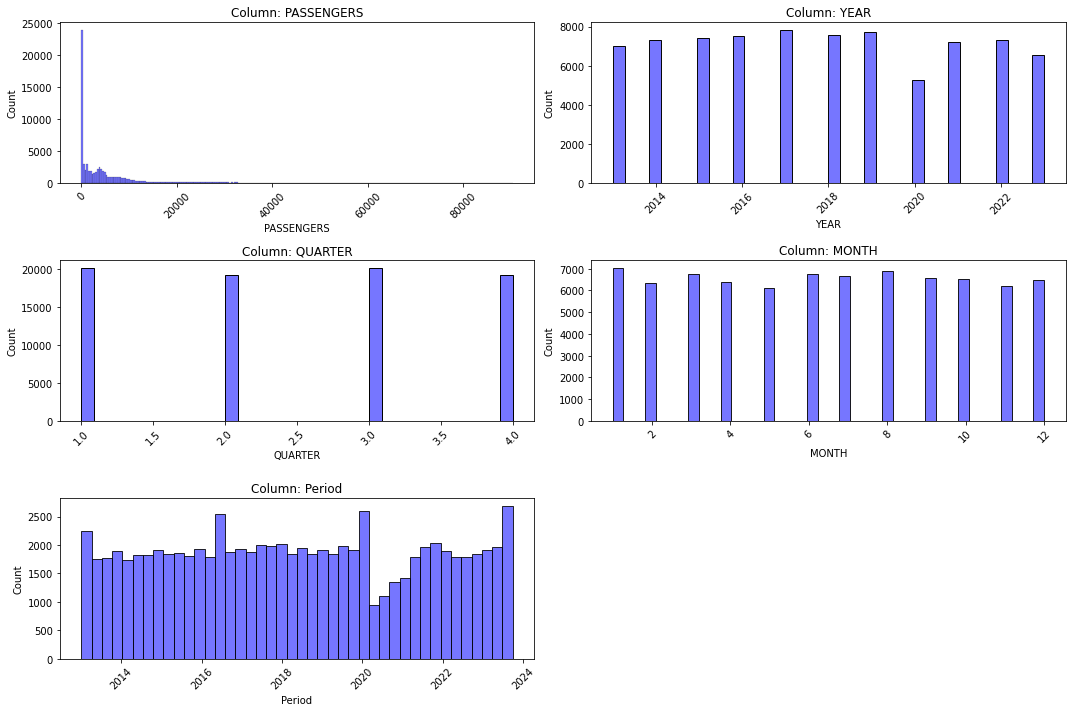

In [33]:
#Show histgram of each column
rows, cols = (3,2)
hist_cols = ['PASSENGERS','YEAR', 'QUARTER', 'MONTH','Period']

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(hist_cols):  
        sns.histplot(df_LAX[hist_cols[i]], stat='count', kde=False, ax=ax)
        ax.set_title(f'Column: {hist_cols[i]}')
        ax.tick_params(axis='x', rotation=45)
ax.axis('off')
plt.tight_layout()
plt.show()

In [34]:
fig = px.histogram(df_LAX, x='UNIQUE_CARRIER', title='Column: UNIQUE_CARRIER')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

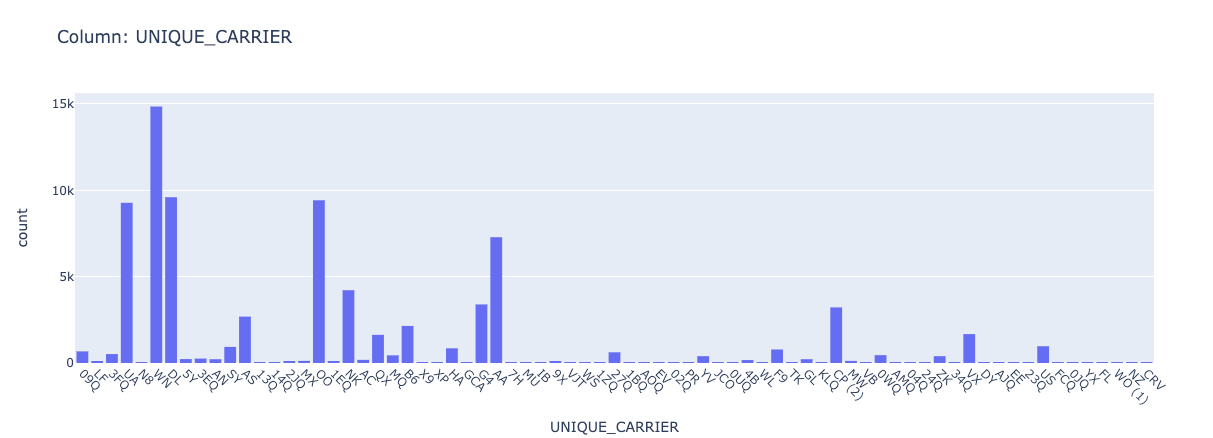

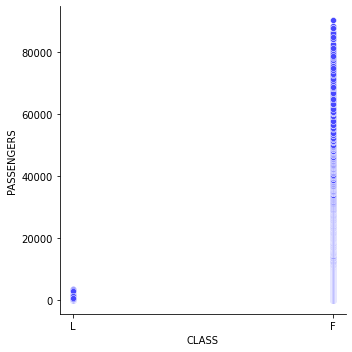

In [35]:
fig = sns.relplot(x='CLASS',y='PASSENGERS', data = df_LAX)

- `PASSENGERS`: The number of passengers is skewed to small numbers. This can be attributed to the large number of samples from Class L records, which represent "Non-Scheduled Civilian Passenger/ Cargo Service L". Chartered flights normally transport smaller number of passengers than regular flights.
- `UNIQUE_CARRIER`: The large air carriers such as WN (Southwest Airlines), DL (Delta Air Lines), AA (American Airlines) have more records in the dataset.
- `Month`, `QUARTER`: Evenly distributed across the period, which proves the excellent data coverage.
- `YEAR`, `Period`:  Evenly distributed across the period in general. Less records were reported during the pandemic time.

Create the aggregated dataset for visualisation and analysis.

`Route_pax_total` summarises the total number of passengers by `Route_cat` over the years.

In [36]:
Route_pax_total = df_LAX.groupby(['Route_cat'])['PASSENGERS'].sum().reset_index()
Route_pax_total = Route_pax_total.sort_values('PASSENGERS', ascending=False)
Route_pax_total.head()

Route_cat  PASSENGERS
323       SFO    32277833
176       JFK    31550567
187       LAS    26325175
261       ORD    25956960
96        DFW    23054151

Check the distribution of number of passengers by route.

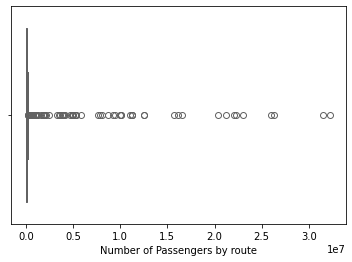

In [37]:
#Box plot
fig = sns.boxplot(data = Route_pax_total, x = 'PASSENGERS') 
plt.xlabel("Number of Passengers by route") 
plt.show()

In [38]:
Route_pax_total.describe()

PASSENGERS
count  3.900000e+02
mean   1.387836e+06
std    4.469458e+06
min    0.000000e+00
25%    1.400000e+01
50%    3.965000e+02
75%    9.309875e+04
max    3.227783e+07

The passenger distribution is very skewed to small numbers. This suggests that the routes with more than 93,000 passengers cover more than 75% of the whole passengers.

In [39]:
#See the number of passengers on routes with more than 93,000 in the dataset period.
fig = px.bar(Route_pax_total[Route_pax_total['PASSENGERS']>=93000], x='Route_cat', y="PASSENGERS", color='Route_cat')
fig.update_layout(title = 'Number of Passengers on routes from/to LAX with more than 93,000 passengers from 2013 to Oct. 2023',
                 yaxis_title = 'Number of Passengers',
                 xaxis_title = 'Routes')
fig.show()

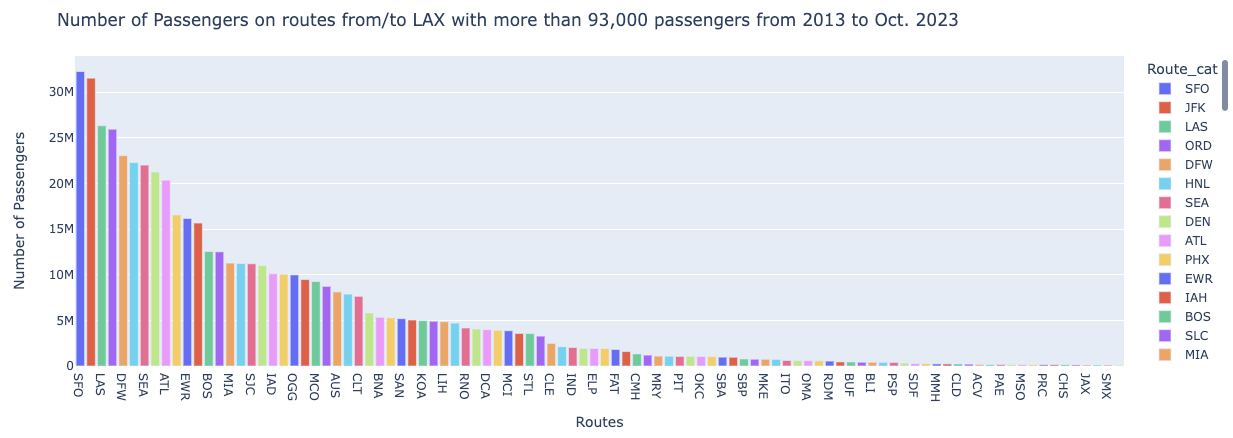

Create the list of TOP 5 and TOP 20 air routes that have largest number of passengers in this dataset.  
`LAX_top5_routes` and `LAX_top20_routes` are the lists of airports which are counterpart of LAX in TOP 5 or10 routes.  

In [40]:
#Identify top 5 routes from/to LAX.
LAX_top5_routes = Route_pax_total['Route_cat'].head(5).tolist()
#Identify top 20 routes from/to LAX.
LAX_top20_routes = Route_pax_total['Route_cat'].head(20).tolist()
print(f'TOP 5 air routes from/to LAX are: {LAX_top5_routes}')
print(f'TOP 20 air routes from/to LAX are: {LAX_top20_routes}')

TOP 5 air routes from/to LAX are: ['SFO', 'JFK', 'LAS', 'ORD', 'DFW']
TOP 20 air routes from/to LAX are: ['SFO', 'JFK', 'LAS', 'ORD', 'DFW', 'HNL', 'SEA', 'DEN', 'ATL', 'PHX', 'EWR', 'IAH', 'BOS', 'SLC', 'MIA', 'MSP', 'SJC', 'PDX', 'IAD', 'OAK']


The TOP 5 routes are identified as follows. 
- SFO: San Francisco International Airport,California
- JFK: John F. Kennedy International Airport, New York
- LAS: Harry Reid International Airport (Las Vegas), Nevada
- ORD: Chicago O'Hare International Airport, Illinois
- DFW: Dallas/Fort Worth International Airport, Texas

Create another dataset `Route_pax` which summarises the number of passengers by route and period.

In [41]:
#Create another dataset for visualisation
Route_pax = df_LAX.groupby(['Route_cat','Period'])['PASSENGERS'].sum().reset_index()
Route_pax.head()

Route_cat     Period  PASSENGERS
0       ABE 2013-08-01           0
1       ABE 2015-06-01           0
2       ABE 2015-07-01           0
3       ABE 2018-08-01           0
4       ABI 2014-04-01           1

Add some more columns for visualisation purpose.

In [42]:
Route_pax['Year'] = Route_pax['Period'].dt.year
Route_pax['Month'] = Route_pax['Period'].dt.month
Route_pax

Route_cat     Period  PASSENGERS  Year  Month
0           ABE 2013-08-01           0  2013      8
1           ABE 2015-06-01           0  2015      6
2           ABE 2015-07-01           0  2015      7
3           ABE 2018-08-01           0  2018      8
4           ABI 2014-04-01           1  2014      4
...         ...        ...         ...   ...    ...
16212       YUM 2014-11-01        3029  2014     11
16213       YUM 2014-12-01         227  2014     12
16214       YUM 2020-10-01           0  2020     10
16215       YUM 2021-10-01          69  2021     10
16216       YUM 2023-09-01           0  2023      9

[16217 rows x 5 columns]

Extract data of TOP 5 routes in `LAX_top5_routes`  from `Route_pax` DataFrame.

In [43]:
Route_pax_top5 = Route_pax[Route_pax['Route_cat'].isin(LAX_top5_routes)]
Route_pax_top5.head()
Route_pax_top20 = Route_pax[Route_pax['Route_cat'].isin(LAX_top20_routes)]
Route_pax_top20.head()

Route_cat     Period  PASSENGERS  Year  Month
675       ATL 2013-01-01      140813  2013      1
676       ATL 2013-02-01      122645  2013      2
677       ATL 2013-03-01      142039  2013      3
678       ATL 2013-04-01      142345  2013      4
679       ATL 2013-05-01      144365  2013      5

Visualise the transition of the number of passengers on top 5 routes from/to LAX from 2013 to October 2023.

In [44]:
fig = px.line(Route_pax_top5, x="Period", y="PASSENGERS", color="Route_cat", line_group="Route_cat")

#Plot the number of passengers based on the DataFrame.
fig.add_vrect(x0="2020-03-01", x1="2020-06-30",fillcolor="gray", opacity=0.3,layer="below", line_width = 0)
#Draw the period when the COVID-19-related travel restrictions were issued. 
fig.add_annotation(x='2020-03-01',y=Route_pax_top5['PASSENGERS'].max(),
    text='COVID-19 related travel restrictions',
    font=dict(color='black', size=11),
    align='center')
#Arrange the layout.
fig.update_layout(title = 'Number of Passengers on top 5 routes from/to LAX from Jan. 2013 to Oct. 2023',
                 yaxis_title = 'Number of Passengers',
                 xaxis_title = 'Period')

fig.show()

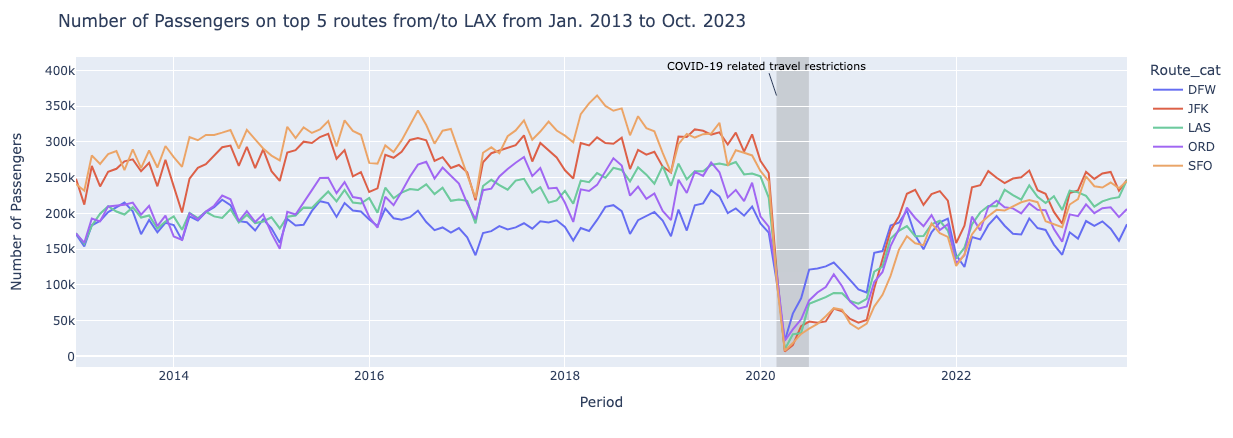

Findings from the visualisation:
- Before the pandemic, the number of passengers on these five routes steadily increased over the years, even though fluctuating.  
- Due to the COVID-19-related travel restrictions, these routes experienced historic drops in April 2020. In particular, on the LAX-JFK route, while the highest demand at around 317,500 pax was recorded in May 2019, the demand shrunk to two per cent of the highest at around 7,000 pax in April 2020.  
- After the pandemic, all the routes phased into the recovery phase. However, except for the DFW route, pre-pandemic levels have yet to be reached. The DFW route has recovered more swiftly compared to other routes.  

Create another dataset to visualise the average monthly passengers by route.

In [45]:
#Compute the monthly average passengers by route.
Route_pax_top5_vis = Route_pax_top5.groupby(['Route_cat','Month'])['PASSENGERS'].mean().reset_index().sort_values(['Route_cat', 'Month'], ascending=True)
Route_pax_top5_vis.head()

Route_cat  Month     PASSENGERS
0       DFW      1  167250.636364
1       DFW      2  150683.181818
2       DFW      3  175179.090909
3       DFW      4  161754.363636
4       DFW      5  179846.272727

In [46]:
#Plot the monthly average by route to identify seasonal trend.
fig = px.line(Route_pax_top5_vis, x="Month", y="PASSENGERS", color="Route_cat", line_group="Route_cat")
fig.update_layout(title = 'Average Monthly Number of Passengers on top 5 routes from/to LAX',
                 yaxis_title = 'Average Monthly Number of Passengers',
                 xaxis_title = 'Period')
fig.show()

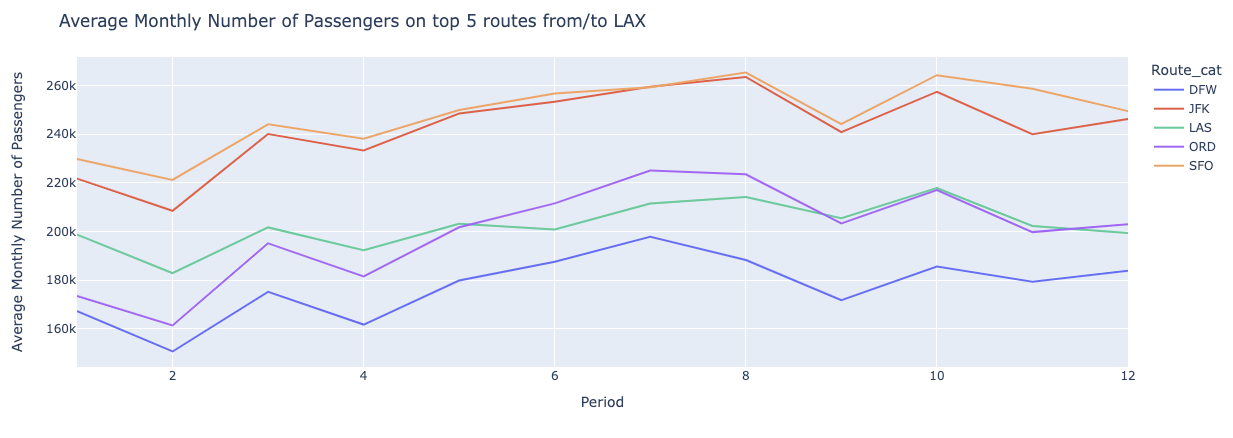

Findings from the visualisation:
- All the routes have similar seasonal patterns.
- Generally, there are two peaks in a year: summer peak (Jul or Aug) and autumn peak (Oct). The peaks are around the holiday seasons.
- The lowest demand is commonly observed in February across the routes.

Create another DataFrame by concatnating the airport coordinates from `dfs1` to visualise the location of the airports.

In [47]:
#Concatnate the DataFrames to add coordinates.
Route_pax_top20_loc = pd.merge(Route_pax_top20, dfs1, left_on='Route_cat', right_on='AIRPORT' , how='left')
Route_pax_top20_loc

Route_cat     Period  PASSENGERS  Year  Month  AIRPORT_ID AIRPORT  \
0          ATL 2013-01-01      140813  2013      1       10397     ATL   
1          ATL 2013-02-01      122645  2013      2       10397     ATL   
2          ATL 2013-03-01      142039  2013      3       10397     ATL   
3          ATL 2013-04-01      142345  2013      4       10397     ATL   
4          ATL 2013-05-01      144365  2013      5       10397     ATL   
...        ...        ...         ...   ...    ...         ...     ...   
2595       SLC 2023-06-01      105941  2023      6       14869     SLC   
2596       SLC 2023-07-01      110616  2023      7       14869     SLC   
2597       SLC 2023-08-01      108199  2023      8       14869     SLC   
2598       SLC 2023-09-01      104940  2023      9       14869     SLC   
2599       SLC 2023-10-01      109157  2023     10       14869     SLC   

                          DISPLAY_AIRPORT_NAME AIRPORT_STATE_NAME   LATITUDE  \
0     Hartsfield-Jackson Atlanta International            Georgia  33.636667   
1     Hartsfield-Jackson Atlanta International            Georgia  33.636667   
2     Hartsfield-Jackson Atlanta International            Georgia  33.636667   
3     Hartsfield-Jackson Atlanta International            Georgia  33.636667   
4     Hartsfield-Jackson Atlanta International            Georgia  33.636667   
...                                        ...                ...        ...   
2595              Salt Lake City International               Utah  40.788333   
2596              Salt Lake City International               Utah  40.788333   
2597              Salt Lake City International               Utah  40.788333   
2598              Salt Lake City International               Utah  40.788333   
2599              Salt Lake City International               Utah  40.788333   

       LONGITUDE  
0     -84.427778  
1     -84.427778  
2     -84.427778  
3     -84.427778  
4     -84.427778  
...          ...  
2595 -111.977778  
2596 -111.977778  
2597 -111.977778  
2598 -111.977778  
2599 -111.977778  

[2600 rows x 11 columns]

In [48]:
#Plot the airport locations of top 20 routes with their monthly passengers.
fig = px.scatter_mapbox(Route_pax_top20_loc, lat="LATITUDE", lon="LONGITUDE", color='PASSENGERS', size='PASSENGERS',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom=2,
                  mapbox_style="carto-positron",
                       animation_frame="Period", animation_group="Route_cat")
fig.show()

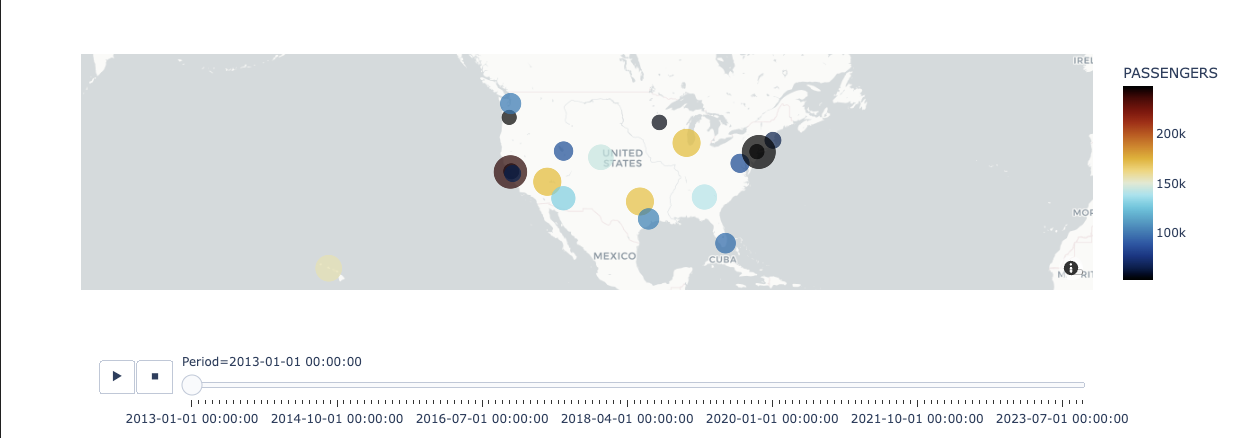

Prepara another dataset for drawing a sankey diagram of the number of passengers on top 20 routes.

In [49]:
#Extract the records of top 20 routes.
df_LAX_top20 = df_LAX[df_LAX['Route_cat'].isin(LAX_top20_routes)]
df_LAX_top20.head()

PASSENGERS  DISTANCE UNIQUE_CARRIER  \
32           0     236.0            3FQ   
33           0     236.0            3FQ   
36           0     308.0             UA   
37           0     308.0             UA   
38           0     308.0             UA   

                           UNIQUE_CARRIER_NAME ORIGIN_AIRPORT_ID ORIGIN  \
32  Western Air Charter, Inc.  d/b/a  Jet Edge             12889    LAS   
33  Western Air Charter, Inc.  d/b/a  Jet Edge             12889    LAS   
36                       United Air Lines Inc.             14831    SJC   
37                       United Air Lines Inc.             14831    SJC   
38                       United Air Lines Inc.             14831    SJC   

   ORIGIN_STATE_NM DEST_AIRPORT_ID DEST DEST_STATE_NM  YEAR  QUARTER  MONTH  \
32          Nevada           12892  LAX    California  2023        2      4   
33          Nevada           12892  LAX    California  2023        3      8   
36      California           12892  LAX    California  2023        1      2   
37      California           12892  LAX    California  2023        3      8   
38      California           12892  LAX    California  2023        3      9   

   CLASS      Route Route_cat     Period  
32     L  LAS - LAX       LAS 2023-04-01  
33     L  LAS - LAX       LAS 2023-08-01  
36     F  SJC - LAX       SJC 2023-02-01  
37     F  SJC - LAX       SJC 2023-08-01  
38     F  SJC - LAX       SJC 2023-09-01

In [50]:
#Compute the total number of passengers by route from 2013 to 2023.
df_LAX_top20_vis = df_LAX_top20.groupby(['ORIGIN','DEST'])['PASSENGERS'].sum().reset_index().sort_values('PASSENGERS', ascending=False)
df_LAX_top20_vis.head()

ORIGIN DEST  PASSENGERS
27    LAX  SFO    16230575
37    SFO  LAX    16047258
18    LAX  JFK    15807542
8     JFK  LAX    15743025
9     LAS  LAX    13210794

In [51]:
#Extract the rows of which origin airports are LAX. 
#Extract the number of passengers departing from LAX to the counterpart airport of top 20 routes. 
df_LAX_top20_vis_oLAX = df_LAX_top20_vis[df_LAX_top20_vis['ORIGIN']=='LAX']
df_LAX_top20_vis_oLAX.head()

ORIGIN DEST  PASSENGERS
27    LAX  SFO    16230575
18    LAX  JFK    15807542
23    LAX  ORD    13129945
19    LAX  LAS    13114381
13    LAX  DFW    11477497

In [52]:
#Give unique node numbers to origin and destination airports for drawing a sankey diagram.
df_LAX_top20_vis_oLAX['Origin_node'] = len(df_LAX_top20_vis_oLAX)
df_LAX_top20_vis_oLAX['Dest_node'] = np.arange(len(df_LAX_top20_vis_oLAX))
df_LAX_top20_vis_oLAX.head()

ORIGIN DEST  PASSENGERS  Origin_node  Dest_node
27    LAX  SFO    16230575           20          0
18    LAX  JFK    15807542           20          1
23    LAX  ORD    13129945           20          2
19    LAX  LAS    13114381           20          3
13    LAX  DFW    11477497           20          4

In [53]:
#Add coordinates of origin/destination airports using "dfs1" DataFrame.

#Add coordinates of origin airport locations using dfs1.
df_LAX_top20_vis_oLAX = pd.merge(df_LAX_top20_vis_oLAX, dfs1, left_on='ORIGIN', right_on='AIRPORT', how='left')
#Add a suffix to the column name to identify "origin" airport coordinates. 
df_LAX_top20_vis_oLAX.rename(columns=lambda x: x + '_O' if x in dfs1.columns else x, inplace=True)

#Add coordinates of destination airport locations using dfs1
df_LAX_top20_vis_oLAX = pd.merge(df_LAX_top20_vis_oLAX, dfs1, left_on='DEST', right_on='AIRPORT', how='left')
#Add a suffix to the column name to identify "destination" airport coordinates.
df_LAX_top20_vis_oLAX.rename(columns=lambda x: x + '_D' if x in dfs1.columns else x, inplace=True)
df_LAX_top20_vis_oLAX.head()

ORIGIN DEST  PASSENGERS  Origin_node  Dest_node  AIRPORT_ID_O AIRPORT_O  \
0    LAX  SFO    16230575           20          0         12892       LAX   
1    LAX  JFK    15807542           20          1         12892       LAX   
2    LAX  ORD    13129945           20          2         12892       LAX   
3    LAX  LAS    13114381           20          3         12892       LAX   
4    LAX  DFW    11477497           20          4         12892       LAX   

      DISPLAY_AIRPORT_NAME_O AIRPORT_STATE_NAME_O  LATITUDE_O  LONGITUDE_O  \
0  Los Angeles International           California     33.9425  -118.408056   
1  Los Angeles International           California     33.9425  -118.408056   
2  Los Angeles International           California     33.9425  -118.408056   
3  Los Angeles International           California     33.9425  -118.408056   
4  Los Angeles International           California     33.9425  -118.408056   

   AIRPORT_ID_D AIRPORT_D           DISPLAY_AIRPORT_NAME_D  \
0         14771       SFO      San Francisco International   
1         12478       JFK    John F. Kennedy International   
2         13930       ORD     Chicago O'Hare International   
3         12889       LAS         Harry Reid International   
4         11298       DFW  Dallas/Fort Worth International   

  AIRPORT_STATE_NAME_D  LATITUDE_D  LONGITUDE_D  
0           California   37.618889  -122.375556  
1             New York   40.640000   -73.778611  
2             Illinois   41.976944   -87.908056  
3               Nevada   36.080000  -115.152222  
4                Texas   32.897222   -97.037778

In [54]:
#Visualise the passenger flow from LAX with the sankey diagram.

#Create the node list including LAX.
nodes_from = df_LAX_top20_vis_oLAX['DEST'].tolist()
nodes_from.append('LAX')
#Draw the sankey diagram
fig = go.Figure(data=[go.Sankey(node=dict(label=nodes_from),
                                link=dict(source=df_LAX_top20_vis_oLAX['Origin_node'], 
                                          target=df_LAX_top20_vis_oLAX['Dest_node'], 
                                          value=df_LAX_top20_vis_oLAX['PASSENGERS']))])
#Arrange the layout.
fig.update_layout(title_text = 'Number of Passengers "from LAX" in top 20 routes in 2013 - Oct 2023')

fig.show()

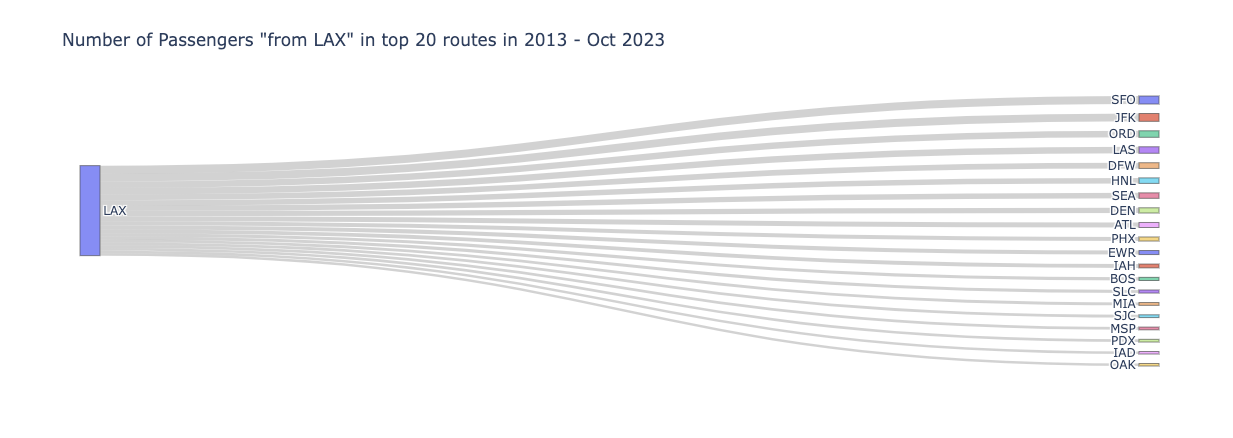

Visualise the passenger flow on top 20 routes from LAX.

In [55]:
#Visualise the passenger flow.
fig = go.Figure()

#Plot the airport locations.
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_LAX_top20_vis_oLAX['LONGITUDE_D'],
    lat = df_LAX_top20_vis_oLAX['LATITUDE_D'],
    hoverinfo = 'text',
    text = df_LAX_top20_vis_oLAX['AIRPORT_D'],
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 100, #3
            color = 'rgba(68, 68, 68, 0)'))))

#Plot the lines of top 20 air routes
for i in range(len(df_LAX_top20_vis_oLAX)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            #Designate the start/end point,
            lon = [df_LAX_top20_vis_oLAX['LONGITUDE_O'][i], df_LAX_top20_vis_oLAX['LONGITUDE_D'][i]],
            lat = [df_LAX_top20_vis_oLAX['LATITUDE_O'][i], df_LAX_top20_vis_oLAX['LATITUDE_D'][i]],
            #Set up information shown in pop-up message box.
            hoverinfo = 'text',
            text = f"{df_LAX_top20_vis_oLAX['AIRPORT_O'][i]}-{df_LAX_top20_vis_oLAX['AIRPORT_D'][i]}, PAX: {df_LAX_top20_vis_oLAX['PASSENGERS'][i]}",
            mode = 'lines',
            line = dict(width = float(df_LAX_top20_vis_oLAX['PASSENGERS'][i]) /2000000, color = 'limegreen'),
            opacity = float(df_LAX_top20_vis_oLAX['PASSENGERS'][i]) /float(df_LAX_top20_vis_oLAX['PASSENGERS'].max())))

#Set up the layout
fig.update_layout(
    title_text = 'Number of Passengers "from LAX" in top 20 routes in Jan. 2013 - Oct. 2023 ',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'equirectangular',
        showland = True,
        showocean = True,
        landcolor = 'rgb(243, 243, 243)',
        oceancolor= 'rgb(0, 0, 102)',
        countrycolor = 'rgb(204, 204, 204)',),
    height=600,)

fig.show()

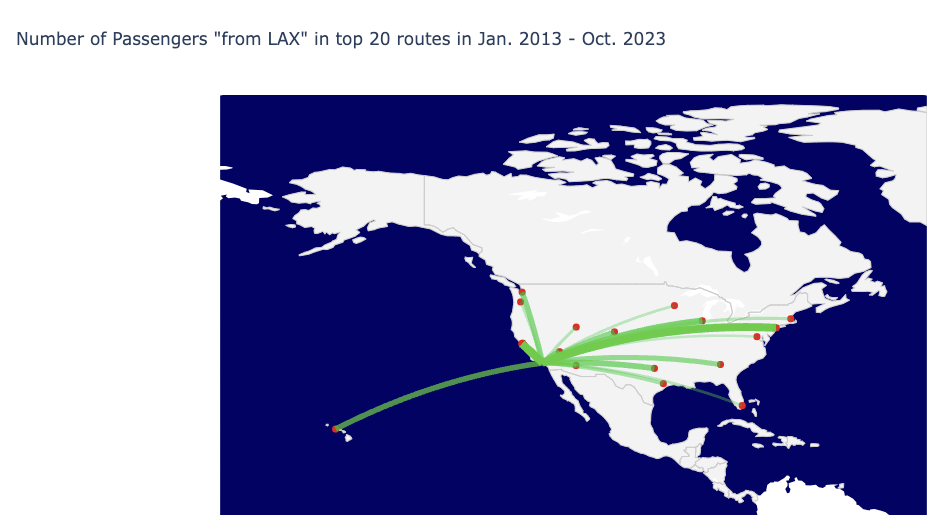

### 7-2. Sub-dataset 2 (Domestic demand forecast (Annual growth rate))

Check the statistics of Sub-dataset 2.

In [56]:
dfs2.describe()

ECO
count  154.000000
mean     2.624822
std      5.379943
min    -27.464972
25%      1.588350
50%      2.277638
75%      3.668181
max     38.062638

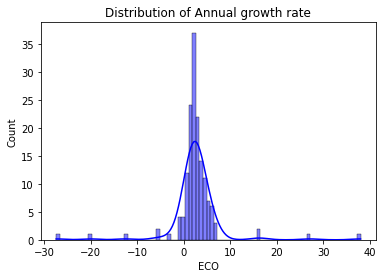

In [57]:
sns.histplot(data=dfs2, x='ECO', kde=True, color='blue')
plt.title('Distribution of Annual growth rate')
plt.show()

It was observed that the relatively large range of values from -27.5% to 38.1%.

Draw the transition of the annual growth rate.

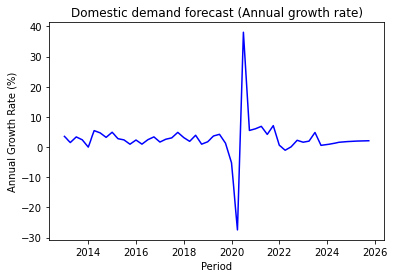

In [58]:
plt.plot(dfs2.index, dfs2['ECO'], linestyle='-', color='b')
plt.title('Domestic demand forecast (Annual growth rate)')
plt.xlabel('Period')
plt.ylabel('Annual Growth Rate (%)')
plt.show()

The pre-pandemic years experienced steady growth.
However, the devastating impact of the pandemic disrupted it and saw a dramatic drop and surge after the travel restrictions.The extreme growth rates were recorded during this time.  
In the post-pandemic time, the domestic demand growth remains steady and positive, recovering from the pandemic.

***

## 8. Data Analysis (Time Series Analysis)

### 8-0. Preparation for Analysis

In the analysis, the number of passengers on the route of LAX-JFK is forecasted.  
The following models were employed and compared.  
- ITS (Interrupted Time Series Model) (Multiple Linear Regression Model)
- SARIMA (Seasonal AutoRegressive Integrated Moving Average) Model
- SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) Model

ITS considers the time since a certain intervention or event. In this project, the COVID-19-related travel restrictions are considred the `intervention`. As the first restriction was issued in late March, `1st April 2020` is set for the intervention date.

The table below summarise the suitable time series analysis model for different dataset.  
In general, these models forecast future time series values by the historical values.  
SARIMAX has a unique feature that it utilises exogenous variables in addition to historical time series values.

|Name|Sutable data|
|:--:|:--|  
| ARMA |  Data with stationarity and non-seasonality |
| ARIMA | Data with non-stationarity and  non-seasonarity |
| SARIMA | Data with non-stationarity and  seasonarity |
| SARIMAX | Data with non-stationarity and  seasonarity (model can include exogenous variables) |

Prepare a DataFrame used for the temporal analysis.  
Note that this project focuses on the number of passengers on the LAX-JFK as a case study.

In [ ]:
#Extract LAX-JFK raws only.
Route_pax_JFK = Route_pax[Route_pax['Route_cat']=='JFK']
#Drop unnecessary columns for the analysis.
Route_pax_JFK.drop(columns=['Route_cat', 'Year', 'Month'], inplace=True)
Route_pax_JFK = Route_pax_JFK.set_index('Period').sort_index() 
Route_pax_JFK = Route_pax_JFK.rename_axis(index=None)
Route_pax_JFK

Split the dataset into the training set and test set.
- __Training__: Jan 2013 to Dec 2022 (the COVID-19 pandemic and the recovery phase)
- __Test__: Jan 2023 - Dec 2023  (the recovery phase only)

In [60]:
y_passengers = Route_pax_JFK['PASSENGERS']
#Split the dataset into training set and test set.
#Create two types (Series and DataFrames) for convenience.
y_train, y_test = y_passengers.head(120), y_passengers.tail(10)
data_train, data_test = Route_pax_JFK.head(120), Route_pax_JFK.tail(10) 
#Note: The length of the whole dataset is 130.

#See the data sets.
print(f'Training set (PAX only): \n {y_train.head()}')
print('\n')
print(f'Test set (PAX only): \n {y_test.head()}')
print('\n')
print(f'Training set (DataFrame): \n {data_train.head()}')
print('\n')
print(f'Test set (DataFrame): \n {data_test.head()}')

Training set (PAX only): 
 2013-01-01    248478
2013-02-01    212135
2013-03-01    266199
2013-04-01    237672
2013-05-01    258089
Name: PASSENGERS, dtype: int32


Test set (PAX only): 
 2023-01-01    201948
2023-02-01    185611
2023-03-01    228495
2023-04-01    232188
2023-05-01    257973
Name: PASSENGERS, dtype: int32


Training set (DataFrame): 
             PASSENGERS
2013-01-01      248478
2013-02-01      212135
2013-03-01      266199
2013-04-01      237672
2013-05-01      258089


Test set (DataFrame): 
             PASSENGERS
2023-01-01      201948
2023-02-01      185611
2023-03-01      228495
2023-04-01      232188
2023-05-01      257973


Visualise the training set and the test set with the travel restriction period.

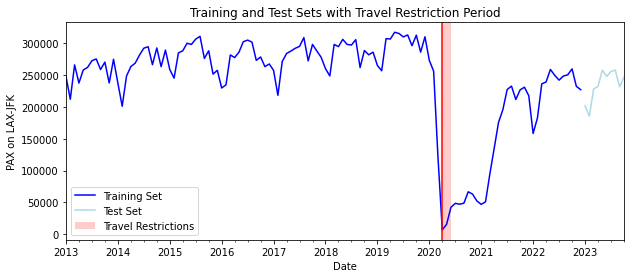

In [61]:
fig, ax = plt.subplots(figsize=(10, 4))
#Training and Test sets
y_train.plot(ax=ax, label='Training Set', color='blue') #
y_test.plot(ax=ax, label='Test Set', color='lightblue')
#Travel restriction period
plt.axvline(pd.to_datetime('2020-04-01'), color = 'red' )
plt.axvspan(xmin='2020-04-01',xmax='2020-06-01', facecolor='red', alpha=0.2, label='Travel Restrictions')

plt.title('Training and Test Sets with Travel Restriction Period')
plt.xlabel('Date')
plt.ylabel('PAX on LAX-JFK')
plt.legend(loc='best')
plt.show()

Create a function of calculating a MAPE (Mean Absolute Percentage Error) value.  
MAPE was employed to compare models to employ how accurate they can predict the number of passengers in test period compared to actual values.  
The lower MAPE is, the more accurate the model can forecast.

In [62]:
#Define the funtion of MAPE (Mean Abolute Percentage Error)
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  sum_abs_diff = sum(absolute_diff_percentage)
  mape = sum_abs_diff / len(predict)
  return print("MAPE : " + str(mape * 100) + " %")

### 8-1. Temporal Analysis 1: Interrupted Time Series Model

In [63]:
data1 = Route_pax_JFK.copy()

In [64]:
#Add [time] column to count the number of months since the first month of the dataset.
data1['time'] = np.arange(len(data1))
data1.head()

PASSENGERS  time
2013-01-01      248478     0
2013-02-01      212135     1
2013-03-01      266199     2
2013-04-01      237672     3
2013-05-01      258089     4

In [65]:
#Check the time when lockdown was introduced.
data1[data1.index=='2020-04-01'].time

2020-04-01    87
Name: time, dtype: int32

Add `intervention` column. 1 represents the period of " post-pandemic", 0 represents "pre-pandemic". 

In [ ]:
data1['intervention'] = np.where(data1['time'] >= 87, 1, 0)
data1

Add `i_time` column to describe how many months have passed since the pandemic.  
This column enables reflecting the impact of the pandemic in the model.

In [67]:
data1['i_time'] = np.where(data1['intervention']== 1, ((data1['time']*data1['intervention'])-86), 0)
data1

PASSENGERS  time  intervention  i_time
2013-01-01      248478     0             0       0
2013-02-01      212135     1             0       0
2013-03-01      266199     2             0       0
2013-04-01      237672     3             0       0
2013-05-01      258089     4             0       0
2013-06-01      262293     5             0       0
2013-07-01      272685     6             0       0
2013-08-01      275493     7             0       0
2013-09-01      258870     8             0       0
2013-10-01      270576     9             0       0
2013-11-01      237784    10             0       0
2013-12-01      275003    11             0       0
2014-01-01      237705    12             0       0
2014-02-01      201198    13             0       0
2014-03-01      248539    14             0       0
2014-04-01      263530    15             0       0
2014-05-01      268817    16             0       0
2014-06-01      281554    17             0       0
2014-07-01      292405    18             0       0
2014-08-01      294720    19             0       0
2014-09-01      266414    20             0       0
2014-10-01      292797    21             0       0
2014-11-01      263399    22             0       0
2014-12-01      289409    23             0       0
2015-01-01      258933    24             0       0
2015-02-01      245405    25             0       0
2015-03-01      284959    26             0       0
2015-04-01      288291    27             0       0
2015-05-01      300196    28             0       0
2015-06-01      298320    29             0       0
2015-07-01      306651    30             0       0
2015-08-01      311086    31             0       0
2015-09-01      276298    32             0       0
2015-10-01      288305    33             0       0
2015-11-01      251706    34             0       0
2015-12-01      257623    35             0       0
2016-01-01      229824    36             0       0
2016-02-01      234895    37             0       0
2016-03-01      281817    38             0       0
2016-04-01      277702    39             0       0
2016-05-01      286115    40             0       0
2016-06-01      302551    41             0       0
2016-07-01      305146    42             0       0
2016-08-01      302036    43             0       0
2016-09-01      273295    44             0       0
2016-10-01      278591    45             0       0
2016-11-01      263440    46             0       0
2016-12-01      267649    47             0       0
2017-01-01      257504    48             0       0
2017-02-01      218336    49             0       0
2017-03-01      271410    50             0       0
2017-04-01      284050    51             0       0
2017-05-01      287900    52             0       0
2017-06-01      292220    53             0       0
2017-07-01      295297    54             0       0
2017-08-01      309084    55             0       0
2017-09-01      272492    56             0       0
2017-10-01      298373    57             0       0
2017-11-01      288048    58             0       0
2017-12-01      278078    59             0       0
2018-01-01      260261    60             0       0
2018-02-01      248783    61             0       0
2018-03-01      298294    62             0       0
2018-04-01      294901    63             0       0
2018-05-01      306297    64             0       0
2018-06-01      298327    65             0       0
2018-07-01      297350    66             0       0
2018-08-01      305864    67             0       0
2018-09-01      261956    68             0       0
2018-10-01      288799    69             0       0
2018-11-01      281989    70             0       0
2018-12-01      286184    71             0       0
2019-01-01      265305    72             0       0
2019-02-01      256969    73             0       0
2019-03-01      307450    74             0       0
2019-04-01      306835    75             0       0
2019-05-01      317483    76             0       0
2019-06-01      315511    77      

Split the dataset into training set and test set.

In [68]:
#Test period is January - October 2023.
y_passengers = data1['PASSENGERS']
data1_train, data1_test = data1.head(120), data1.tail(10)

Develop a multiple linear regression model considering the number of months since the travel restrictions.

In [69]:
#the y variable is the mobility at transit stations
y = data1_train['PASSENGERS']
#the X variables are time, whether or not the intervention has happened, and time since the intervention
X = data1_train[['time', 'intervention', 'i_time']]
#add a constant to X
x1 = sm.add_constant(X)
#create an OLS regression model
mod = sm.OLS(y, x1) 
#fit the model
results = mod.fit()
#print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             PASSENGERS   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           8.75e-44
Time:                        13:29:14   Log-Likelihood:                -1411.3
No. Observations:                 120   AIC:                             2831.
Df Residuals:                     116   BIC:                             2842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.608e+05   6706.277     38.886   

In [70]:
#Create a new dataset for future prediction. (out-of-sample prediction)
data1_future = Route_pax_JFK.copy()
start_date = '2023-11-01'
date1_future = pd.date_range(start=start_date, periods=36, freq='MS') #Predict for future 3 years
data1_future = pd.DataFrame({'Period': date1_future})
data1_future['time'] = range(130, 130 + len(data1_future), 1)
data1_future['intervention'] = 1
data1_future['i_time'] = range(44, 44 + len(data1_future), 1)
data1_future = data1_future.set_index('Period').sort_index() 
data1_future = data1_future.rename_axis(index=None)
data1_future.head()

time  intervention  i_time
2023-11-01   130             1      44
2023-12-01   131             1      45
2024-01-01   132             1      46
2024-02-01   133             1      47
2024-03-01   134             1      48

In [71]:
#Prediction: Training period
X_train = data1_train[['time', 'intervention', 'i_time']]
x1_train = sm.add_constant(X_train, has_constant='add')
prediction_train = results.predict(x1_train)
prediction_train.head()

2013-01-01    260778.546499
2013-02-01    261123.663435
2013-03-01    261468.780370
2013-04-01    261813.897305
2013-05-01    262159.014240
dtype: float64

In [72]:
#Prediction: Test period
X_test = data1_test[['time', 'intervention', 'i_time']]
x1_test = sm.add_constant(X_test, has_constant='add')
prediction_test = results.predict(x1_test)
prediction_test.head()

2023-01-01    300725.681818
2023-02-01    309101.486631
2023-03-01    317477.291444
2023-04-01    325853.096257
2023-05-01    334228.901070
dtype: float64

In [73]:
#Prediction: Future period (out-of-sample period)
X_future = data1_future[['time', 'intervention', 'i_time']]
x1_future = sm.add_constant(X_future, has_constant='add')
prediction_future = results.predict(x1_future)
prediction_future.head()

2023-11-01    384483.729947
2023-12-01    392859.534759
2024-01-01    401235.339572
2024-02-01    409611.144385
2024-03-01    417986.949198
dtype: float64

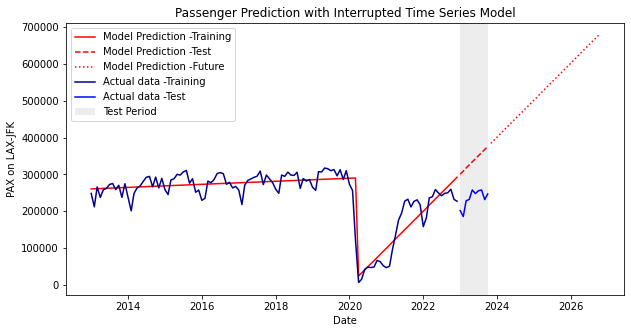

In [74]:
#Visualise the model prediction.
fig = plt.figure(figsize=(10, 5))
#Model Prediction
plt.plot(prediction_train, color="red", label='Model Prediction -Training')
plt.plot(prediction_test, linestyle="dashed", color="red", label='Model Prediction -Test')
plt.plot(prediction_future, linestyle=':', color="red", label='Model Prediction -Future')
#Actual data
plt.plot(y_train, label='Actual data -Training', color="darkblue")
plt.plot(y_test, label='Actual data -Test',  color="blue")
#Test period
plt.axvspan(xmin='2023-01-01',xmax='2023-10-01', facecolor='darkgrey', alpha=0.2, label='Test Period')

plt.title('Passenger Prediction with Interrupted Time Series Model')
plt.xlabel('Date')
plt.ylabel('PAX on LAX-JFK')
plt.legend(loc='best')
plt.show()

In [75]:
#Compute the Mape value.
Mape(prediction_test, y_test)

MAPE : 44.99589630583706 %


__Explanation of Result__
- The model's adj. R-squared value is 0.821, which is large enough to predict the number of passengers during the "training" period. All the independent variables in the model are statistically significant.  
- As for the test and future (out-of-sample) period, the plot graph illustrates that the predicted number of passengers linearly increases even after the training period, while the actual data presents that the demand did not recover dramatically and stagnated below the pre-pandemic level.
- The model is adaptive to a single dramatic change such as the pandemic. However, while this model takes independent variables that explain the intervention, other factors such as economic index are not considered. It implies that the current model is not responsive if another dramatic change occurs, as the model considers only COVID-related variables. 
- The gradual recovery from the pandemic is not reflected as such independent variables to constrain the growth are not included. In addition, the training data influenced the model, which contained the historic fall and outstanding recovery from 2021 to 2022. This is why the model predicted drastic linear growth even after 2024. 
- Due to the nature of the Multiple Linear Regression Model, it has limitations in expressing minute ups and downs, such as monthly and seasonal fluctuation. On the other hand, the actual demand has distinctive ups and downs across months.  
- MAPE is approximately 45%, which indicates a less accurate prediction.

### 8-2. Temporal Analysis 2: SARIMA Model

#### 8-2-1. Box-Jenkins Method (Understaing data)

To understand the time series data for analysis and identify a suitable model, the Box-Jenkins Method was employed.  
This method provides the systematic approach in developing a model with suitable components.
The steps for building a model is described below.

1. Understand the time series data to identify suitable model
   1. Check the stationarity
   2. Check the seasonality
   3. How many differencing is required to make the data stationary.
2. Estimate suitable parameters  
3. Develop model with estimated parameters
4. Evaluate model accuracy

##### Step1: Understand the time series data to identify suitable model

Use `data_train` DataFrame for developing SARIMA model. 

Conduct Augmented Dickey-Fuller (ADF) test to check if the time series data is stationary.  
ADF test examines if a unit root is present in the data.  
- Null Hypothesis (H0): A unit root is present in the data. The data is non-stationary. (p>0.05)
- Null Hypothesis (H1): A unit root is present in the data. The data is stationary.  (p=<0.05)

If the test result returns p-value greater than 0.05, the null hypothesis (H0) cannot be rejected.

In [76]:
#Carry out ADF test 
results = adfuller(data_train)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -1.906346
p-value: 0.329082


The p-value is 0.24, which is greater than 0.05. This indicates that the data is __non-stationary__ .   
The result suggests that __the suitable model for this data is either ARIMA, SARIMA or SARIMAX.__

Decompose the original time series data into "trend", "seasonality" and "residual".

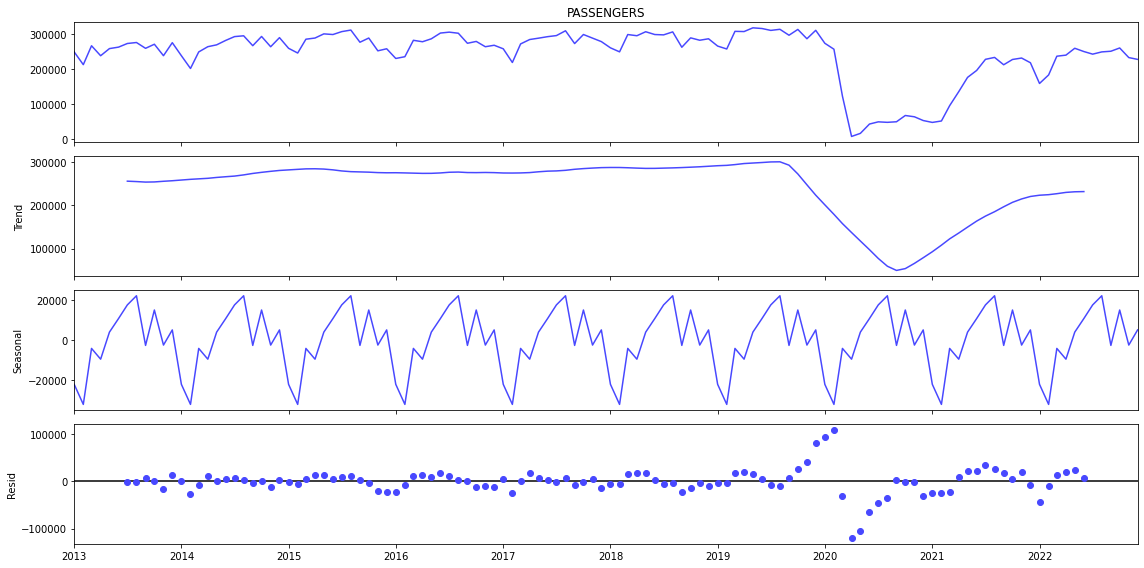

In [77]:
#Draw 4 types of plots: 1) Original data,2) Trend, 3) Seasonal, and 4)Residual 
res = sm.tsa.seasonal_decompose(data_train['PASSENGERS'])
fig = res.plot()
fig.set_size_inches(16,8)
fig.tight_layout()

Findings:
- The `Trend` plot visualises the pre-pandemic upward trend, following the dramatic drop as well as the recovery trend over time. This means that the time series data is non-stationary.
- The `Seasonal` plot exhibits strong seasonality, with a cycle length of 12 months.
- The `Residual` plot shows the distinctive large residual around the pandemic time, which is considered an irregular pattern.

##### Step2: Estimate suitable parameters

Plot the original data and data with 12 months offset to make sure that the seasonal cycle length is 12 months.

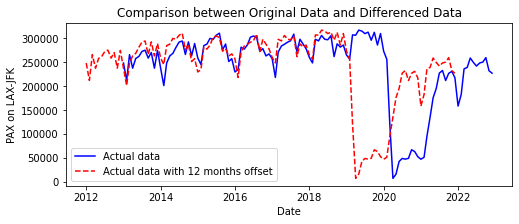

In [78]:
#Create a time Series for original data
index_period = data_train.index
index_period = index_period.to_numpy()
#Create a time Series with 12 month differencing from original data
offset_period = data_train.index - pd.DateOffset(months=12) #offset by 12 months
offset_period = offset_period.to_numpy()

#Plot the two data
fig = plt.figure(figsize=(8, 3))
plt.plot(index_period, data_train['PASSENGERS'], linestyle="solid", color="blue", label='Actual data')
plt.plot(offset_period, data_train['PASSENGERS'], linestyle="dashed", color="red", label='Actual data with 12 months offset')
plt.legend(loc='best')

plt.title('Comparison between Original Data and Differenced Data')
plt.xlabel('Date')
plt.ylabel('PAX on LAX-JFK')
plt.legend(loc='best')
plt.show()

The original data and the data with the offset are overlapping in most times except for the pandemic period.  
It suggests it is reasonable to adopt __the parameter of `S=12`__ (12 months periodity).

As a next step, apply AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) of original data to identify suitable parameters.  
The plots of ACF and PACF illustrate the periodicity of the original data.
- ACF exhibits the similarity of the original data and lagged data.  
- PACF describes the partial correlation of the original data with the lagged data.

ACF and PACF suggest the candidates for parameters `p` and `q`.
- The plots outside the hatching area in ACF are candidates for the parameter `q`.
- The plots outside the hatching area in PACF are candidates for the parameter `p`.

Note: The hatching area is the 95% confidence interval. The plots outside the hatching area are considered statistically different values.  

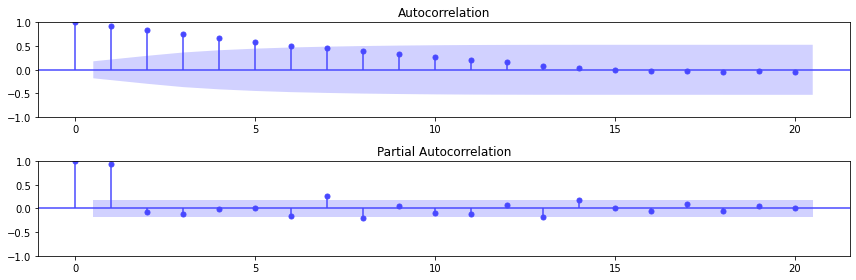

In [79]:
#Check ACF and PACF of original time series data.

#Plot of ACF: Correlogram
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data_train, lags=20, ax=ax1) 

#Plot of PACF:
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data_train, lags=20, ax=ax2) 
plt.tight_layout()

The plots give the following insights:
- ACF: the parameter __`q` should fall into the range of (0,6)__.
- PACF: the parameter __`p` should fall into the range of (0,3)__.



Next, identify the parameter d by taking the difference.
Note: In the case of analysing time series data with seasonality and non-stationarity, it is vital to analyse data after converting it to stationary. Taking the difference in the original data enables the removal of non-stationarity.

In [80]:
#Take the difference of the original data.
data_train_diff = data_train.diff()
#Drop na rows (differenced data always have na rows.)
data_train_diff.dropna(inplace=True)
data_train_diff.head()

PASSENGERS
2013-02-01    -36343.0
2013-03-01     54064.0
2013-04-01    -28527.0
2013-05-01     20417.0
2013-06-01      4204.0

Conduct the ADF test again with the differenced data to confirm that the non-stationarity has been removed successfully.

In [81]:
#ADF test with the differenced data
results = adfuller(data_train_diff)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -3.489800
p-value: 0.008253


The p-value is 0.008, which is small enough to reject the null hypothesis.
It indicates that the differenced data is stationary. 

Double-check with ACF and PACF plots if the differenced data has no stationarity.

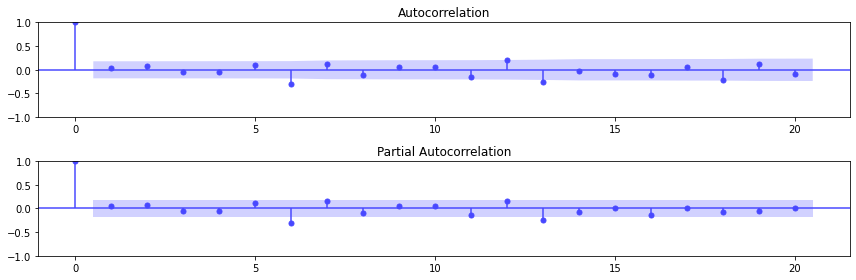

In [82]:
#Plot of ACF (Differenced data)
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data_train_diff['PASSENGERS'], lags=20, ax=ax1) 
#Plot of PACF (Differenced data)
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data_train_diff['PASSENGERS'], lags=20, ax=ax2) 
plt.tight_layout()

Most plots of ACF and PACF fall into the 95% confidence interval (hatching area).   
It is confirmed that the differencing has successfully removed the non-stationarity.  
Therefore, the paramter is determined as __`d=1`__.

Estimate the parameters of `p` and `q` using the function `arma_order_select_ic`.  
This function identifies the best combination of `(p, q)` for ARMA model based on AIC (Akaike Information Criterion) or BIC ( Bayesian Information Criterion).  
The model is applicable only for stationary data with non-seasonality.  
To apply this, it is necessary to remove the seasonality from differenced data (stationary data) .

In [83]:
#Before apply "arma_order_select_ic", remove the seasonality from the differenced data.
data_train_seasonal_diff = data_train_diff.diff(12).dropna()

In [ ]:
#Compute information criteria for many ARMA models.
#Identify the best combination of (p,q), which has lowest AIC.
res = sm.tsa.arma_order_select_ic(data_train_seasonal_diff, max_ar=4, max_ma=4, ic='aic')
print(res.aic_min_order)

The combination of __`(p,q) = (3,2)`__, which returned the smallest AIC, is employed as parameters for SARIMA.
Note that the values of `p` and `q` are within the range of [0,2] and [0,6] respectively.

##### Step3: Develop model with estimated parameters

According to the former steps, the best parametes were identified.  
Combinations of`(P, D, Q)` were examined and the best combination was selected based on MAPE once developing SARIMA with the combination (See the following codes).  
The estimated parameters are: __`SARIMA(p,d,q)(P,D,Q,S) = (3,1,2)(1,1,1,12)`__.

Develop SARIMA model with the estimated parameters.  
Note: `y_train` is the Series version of the DataFrame `data_train`. They are the same.

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
result = SARIMAX(y_train, order=(3,1,2), seasonal_order=(1,1,1,12)).fit()
result.summary()

C:\Users\subar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\subar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PASSENGERS   No. Observations:                  120
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1247.627
Date:                              Tue, 23 Jan 2024   AIC                           2511.254
Time:                                      13:29:21   BIC                           2532.637
Sample:                                  01-01-2013   HQIC                          2519.922
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9084      0.584     -1.556      0.120      -2.053       0.236
ar.L2         -0.3876      0.562     -0.690      0.490      -1.488       0.713
ar.L3          0.0907      0.341      0.266      0.790      -0.577       0.759
ma.L1          1.1884      0.553      2.151      0.032       0.105       2.271
ma.L2          0.7032      0.656      1.071      0.284      -0.584       1.990
ar.S.L12       0.1852      0.170      1.088      0.277      -0.148       0.519
ma.S.L12      -0.7502      0.180     -4.176      0.000      -1.102      -0.398
sigma2      1.034e+09   3.98e-09    2.6e+17      0.000    1.03e+09    1.03e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):              1416.40
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               5.04   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.07e+32. Standard errors may be unstable.
"""

##### Step4: Evaluate model accuracy

Make forecasted values with the model and visualise its accuracy.

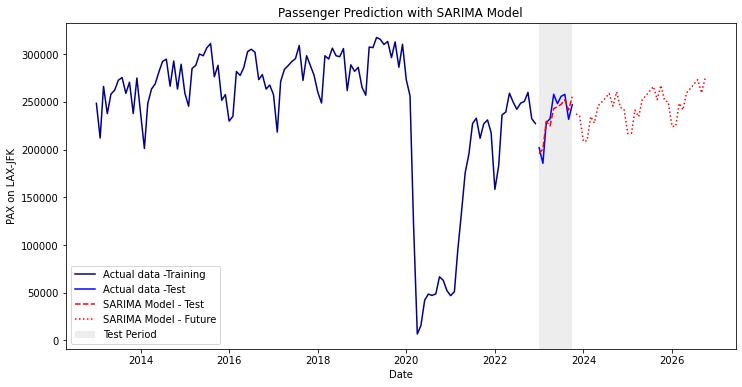

In [86]:
#Prediction during test period. (Jan 2023-Oct 2023)
start_test = y_test.index.min()
end_test = y_test.index.max()
model_test = result.predict(start_test, end_test)

#Prediction for the future period (out-of-sample period) after Oct 2023
start_future = '2023-11-01'
end_future = '2026-10-01'
model_future = result.predict(start_future, end_future)

#Plot the predicted values as well as the actual record.
fig = plt.figure(figsize=(12, 6))
#Plot actual record.
plt.plot(y_train, label='Actual data -Training', color="darkblue")
plt.plot(y_test, label='Actual data -Test',  color="blue")
#Plot predicted values during test period.
plt.plot(model_test, color = "red", linestyle="dashed", label = 'SARIMA Model - Test')
#Plot predicted values for the future period.
plt.plot(model_future, color = 'red', linestyle=':', label = 'SARIMA Model - Future')
#Plot test period
plt.axvspan(xmin='2023-01-01',xmax='2023-10-01', facecolor='darkgrey', alpha=0.2, label='Test Period')

plt.title('Passenger Prediction with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('PAX on LAX-JFK')
plt.legend(loc='best')
plt.show()

Calculate the MAPE to demonstrate the model's accuracy.

In [87]:
Mape(model_test, y_test)

MAPE : 3.5165317747998195 %


The MAPE is low enough to verify its high accuracy during the test period.

Draw diagnostic plots to evaluate the SARIMA model.

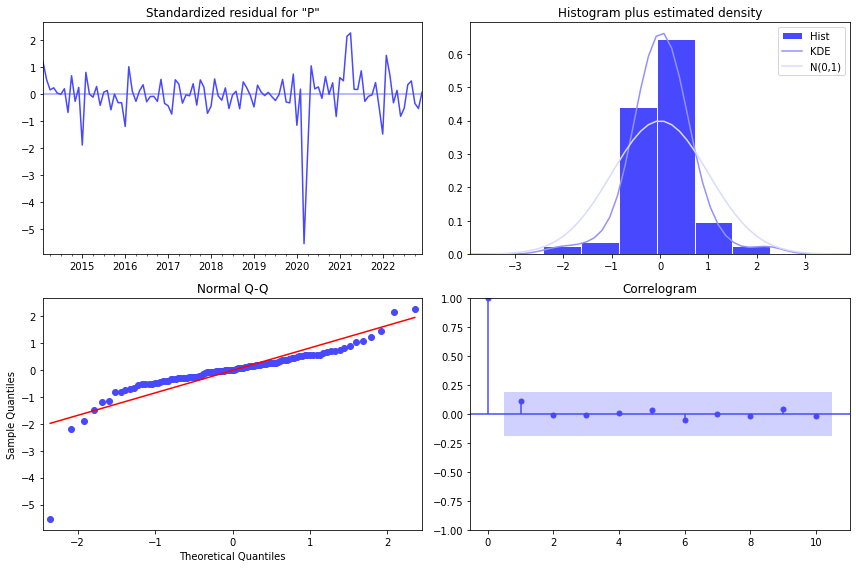

In [88]:
#Draw diagnostic plots
plot = result.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()

- `Kernel Density Estimate Plot`: Plots model's residuals.  
- `Histogram of Residuals`: Shows the model distribution of residuals. A high accuracy model's distribution is close to the normal distributution.  This model's plot nearly follows the normal distribution. 
- `Quantile-Quantile (Q-Q) Plot`: Plots the distribution of residuals and the normal distribution. A high accuracy model's distribution is close to the normal distributution (red-line). Even though the model has some outliers, it generally follows the normal distribution plots.  
- `Correlogram (ACF)`: Shows the remaining seasonal/cyclic patterns of data. It should fall into the 95% confidence interval area. The model's ACF perfectly falls into the ideal range. 

__Explanation of Result__  

- MAPE and the diagnostic plots indicate the high accuracy of the model prediction.
- In the test and future (out-of-sample) period, the model forecasts steady growth/recovery towards the pre-pandemic level. The forecasted values seem to be relatively pessimistic given that IATA states that the passenger traffic will completely recover from the pandemic by the end of 2023 and double by 2040. On the other hand, it should be noted that the passenger traffic on the case study route has yet to fully recover as of October 2023.
- Because of the SARIMA model's nature, it replicates the seasonality very precisely in the prediction. It is also adaptive to dramatic changes such as the pandemic. 

### 8-3. Temporal Analysis 3: SARIMAX Model

The SARIMAX model is an extended version of the SARIMA model in that it is able to consider exogenous variables.
This project adopted the U.S. domestic demand forecast (Annual growth rate %) for the exogenous variable, considering the data availability for the future period and that the existing literature identified that economic indexes such as gross domestic product (GDP) are effective for air traffic demand forecast.   

##### Step1: Prepare data sets

Prepare the DataFrames.

In [89]:
#Copy economic data (Sub-dataset 2)
ECO_US = dfs2.copy()
ECO_US.head()

ECO
2013-01-01  3.543825
2013-02-01  2.863038
2013-03-01  2.182252
2013-04-01  1.501466
2013-05-01  2.121285

In [90]:
#Copy the DataFrames of training and test sets
data2_train, data2_test = data_train.copy(), data_test.copy()
data2_train.head

<bound method NDFrame.head of             PASSENGERS
2013-01-01      248478
2013-02-01      212135
2013-03-01      266199
2013-04-01      237672
2013-05-01      258089
2013-06-01      262293
2013-07-01      272685
2013-08-01      275493
2013-09-01      258870
2013-10-01      270576
2013-11-01      237784
2013-12-01      275003
2014-01-01      237705
2014-02-01      201198
2014-03-01      248539
2014-04-01      263530
2014-05-01      268817
2014-06-01      281554
2014-07-01      292405
2014-08-01      294720
2014-09-01      266414
2014-10-01      292797
2014-11-01      263399
2014-12-01      289409
2015-01-01      258933
2015-02-01      245405
2015-03-01      284959
2015-04-01      288291
2015-05-01      300196
2015-06-01      298320
2015-07-01      306651
2015-08-01      311086
2015-09-01      276298
2015-10-01      288305
2015-11-01      251706
2015-12-01      257623
2016-01-01      229824
2016-02-01      234895
2016-03-01      281817
2016-04-01      277702
2016-05-01      286115
2016

Concatnate the Main dataset and Sub-dataset 2. Prepare the training and test data. 

In [91]:
#Concatenate DataFrames with the date column
data2_train = pd.merge(data2_train, ECO_US,  left_on=data2_train.index, right_on=ECO_US.index, how='left')
data2_test = pd.merge(data2_test, ECO_US,  left_on=data2_test.index, right_on=ECO_US.index, how='left')
data2_test

key_0  PASSENGERS       ECO
0 2023-01-01      201948  1.610600
1 2023-02-01      185611  1.729160
2 2023-03-01      228495  1.847720
3 2023-04-01      232188  1.966281
4 2023-05-01      257973  2.923898
5 2023-06-01      248123  3.881515
6 2023-07-01      255753  4.839132
7 2023-08-01      257896  3.416440
8 2023-09-01      231675  1.993748
9 2023-10-01      246968  0.571056

Organise the dataset. (Set the date column as the index and remove the column name from the index.)

In [92]:
#Organise the training dataset
data2_train = data2_train.set_index('key_0').sort_index() 
data2_train = data2_train.rename_axis(index=None)
#Organise the test dataset
data2_test = data2_test.set_index('key_0').sort_index() 
data2_test = data2_test.rename_axis(index=None)

Prepare the training and test dataset.

In [93]:
x_ECO_train, x_ECO_test = data2_train['ECO'], data2_test['ECO']

In [94]:
x_ECO_train.head()

2013-01-01    3.543825
2013-02-01    2.863038
2013-03-01    2.182252
2013-04-01    1.501466
2013-05-01    2.121285
Name: ECO, dtype: float64

In [95]:
x_ECO_test.head()

2023-01-01    1.610600
2023-02-01    1.729160
2023-03-01    1.847720
2023-04-01    1.966281
2023-05-01    2.923898
Name: ECO, dtype: float64

##### Step2: Develop model with estimated parameters

SARIMAX requires `(p,d,q)(P,D,Q,S)` parameters as SARIMA.  
The same set of parameters were selected for SARIMAX model as the training data is the same.    
The parameters are: __`SARIMAX (p,d,q)(P,D,Q,S) = (3,1,2)(1,1,1,12)`__ .  
The exogenous variable for training is __`x_ECO_train`__.

In [96]:
#Building a SARIMAX model
result2 = SARIMAX(endog = y_train, exog = x_ECO_train, 
    order = (3, 1, 4), seasonal_order = (1,1,1,12)).fit()
result2.summary()

C:\Users\subar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\subar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PASSENGERS   No. Observations:                  120
Model:             SARIMAX(3, 1, 4)x(1, 1, [1], 12)   Log Likelihood               -1245.917
Date:                              Tue, 23 Jan 2024   AIC                           2513.834
Time:                                      13:29:24   BIC                           2543.235
Sample:                                  01-01-2013   HQIC                          2525.753
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ECO         1110.4202   1188.559      0.934      0.350   -1219.113    3439.953
ar.L1         -0.9418      5.357     -0.176      0.860     -11.442       9.559
ar.L2         -0.1289      7.662     -0.017      0.987     -15.147      14.889
ar.L3          0.3538      4.068      0.087      0.931      -7.619       8.327
ma.L1          1.2212      5.356      0.228      0.820      -9.277      11.719
ma.L2          0.4992      9.189      0.054      0.957     -17.511      18.509
ma.L3         -0.2732      6.720     -0.041      0.968     -13.444      12.898
ma.L4         -0.0689      1.409     -0.049      0.961      -2.831       2.693
ar.S.L12       0.1658      0.184      0.900      0.368      -0.195       0.527
ma.S.L12      -0.7393      0.207     -3.565      0.000      -1.146      -0.333
sigma2      1.045e+09      0.007   1.47e+11      0.000    1.05e+09    1.05e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):              1216.87
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                            -2.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.42e+25. Standard errors may be unstable.
"""

##### Step3: Evaluate model accuracy

Make forecasted values with the model and visualise its accuracy.

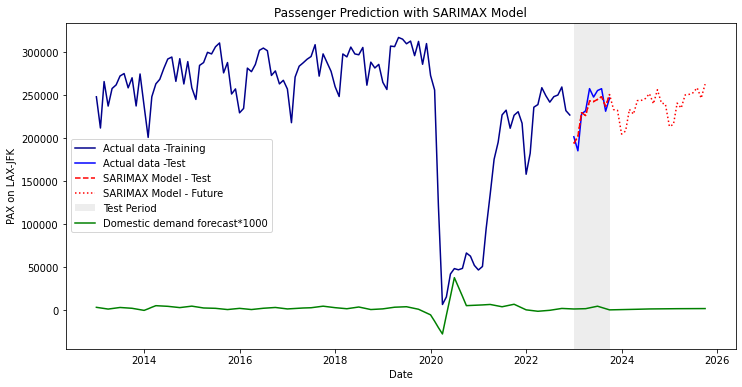

In [97]:
#Prediction during test period. (Jan 2023-Oct 2023)
start_test = y_test.index.min()
end_test = y_test.index.max()
model_test2 = result2.predict(start_test, end_test, exog=x_ECO_test)

#Prediction for the future period. (Jan 2023-Oct 2023)
## Make the Series to be given as an exogenous variable to the model.
x_ECO_future = ECO_US[ECO_US.index >= '2023-01-01']['ECO']
## Make prediction giving the exogenous variable.
forecast = result2.get_forecast(steps=len(x_ECO_future), exog=x_ECO_future)

#Plot the predicted values as well as the actual record.
fig = plt.figure(figsize=(12, 6))
#Plot actual record.
plt.plot(y_train, label='Actual data -Training', color="darkblue")
plt.plot(y_test, label='Actual data -Test',  color="blue")
#Plot predicted values during test period.
plt.plot(model_test2, color = "red", linestyle="dashed", label = 'SARIMAX Model - Test')
#Plot predicted values for the future period.
plt.plot(forecast.predicted_mean, color = 'red', linestyle=':', label = 'SARIMAX Model - Future')
#Plot test period
plt.axvspan(xmin='2023-01-01',xmax='2023-10-01', facecolor='darkgrey', alpha=0.2, label='Test Period')
#Plot domestic demand forecast
plt.plot(ECO_US['ECO']*1000, color = 'green', linestyle='-', label = 'Domestic demand forecast*1000')

plt.title('Passenger Prediction with SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('PAX on LAX-JFK')
plt.legend(loc='best')
plt.show()

Calculate the MAPE to demonstrate the model's accuracy.

In [98]:
mape = Mape(model_test2, y_test)

MAPE : 3.5328197984635676 %


The MAPE is low enough to verify its high accuracy during the test period.

Draw diagnostic plots to evaluate the SARIMAX model.

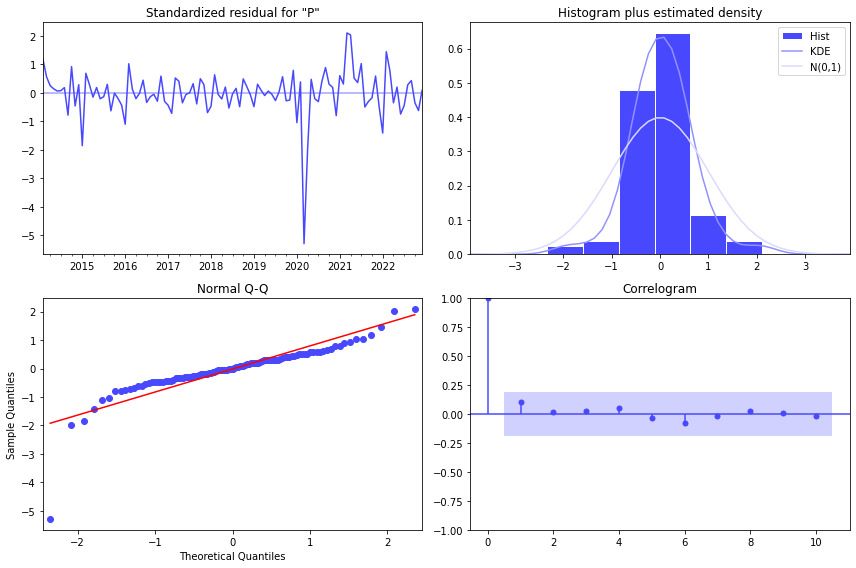

In [99]:
plot = result2.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()

As the result of SARIMA model, the diagnostic plots demonstrated high accuracy of the SARIMAX model.

__Explanation of Result__  

- Overall, the prediction of the SARIMAX is quite similar to the one of the SARIMA model.
- MAPE and the diagnostic plots indicate the high accuracy of the model prediction.
- In the test and future (out-of-sample) period, the model forecasts steady growth/recovery toward the pre-pandemic level. The forecasted values are relatively pessimistic.
- As the SARIMAX model shares the most features of the SARIMA, it also replicates the seasonality very precisely in the prediction. It is also adaptive to dramatic changes such as the pandemic.
- As shown in the coefficient, the exogenous variable has a positive association with the dependent variable.
- The p-value of the exogenous variable was only 0.35, which means that the variable is not statistically significant. Replacing the variable with another improves the model's accuracy.

***

## 9. Results

Plot the predicted results of three models.

In [100]:
fig = go.Figure()

# Plot actual record
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual data -Test', line=dict(color='blue')))

# Interupted Time Series Model
fig.add_trace(go.Scatter(x=prediction_test.index, y=prediction_test, mode='lines', name='Model Prediction -Test', line=dict(color='magenta', dash='dash')))
fig.add_trace(go.Scatter(x=prediction_future.index, y=prediction_future, mode='lines', name='Model Prediction -Future', line=dict(color='magenta')))

# SARIMA Model
fig.add_trace(go.Scatter(x=model_test.index, y=model_test, mode='lines', name='SARIMA Model - Test', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=model_future.index, y=model_future, mode='lines', name='SARIMA Model - Future', line=dict(color='red')))

# SARIMAX Model
fig.add_trace(go.Scatter(x=model_test2.index, y=model_test2, mode='lines', name='SARIMAX Model - Test', line=dict(color='lightgreen', dash='dash')))
fig.add_trace(go.Scatter(x=forecast.predicted_mean.index, y=forecast.predicted_mean, mode='lines', name='SARIMAX Model - Future', line=dict(color='lightgreen')))

# Update layout
fig.update_layout(
    title='Passenger Prediction with Three Time Series Models',
    xaxis=dict(title='Date'),
    yaxis=dict(title='PAX on LAX-JFK'),
    legend=dict(x=1, y=0, traceorder='normal', orientation='v'),
    showlegend=True)

# Show figure
fig.show()

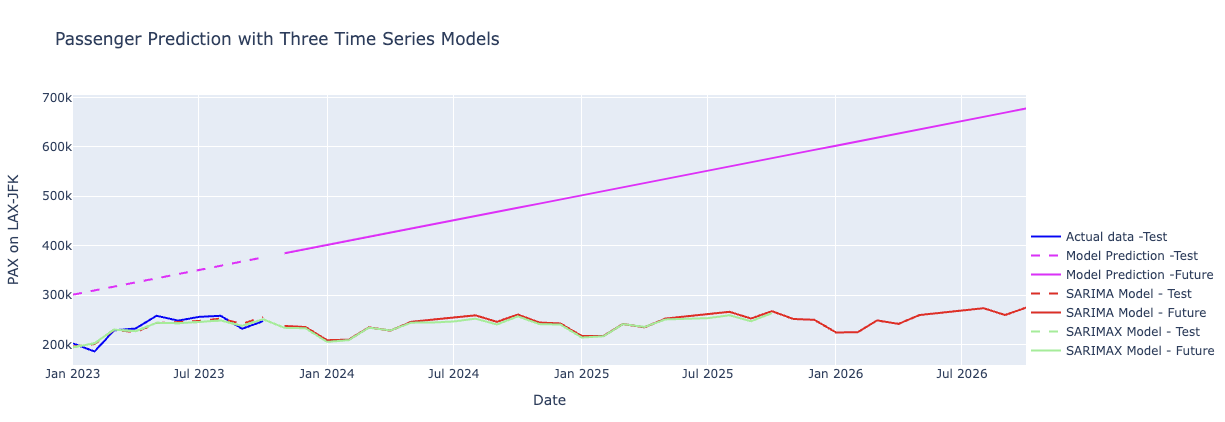

Summarise the predicted results with MAPE.

|Model|MAPE|Predicted Result|
|:--:|:--:|:--:|
| ITS | 45.00% | Optimistic (Linearly recover from the pandemic with constant growth) |
| SARIMA | 3.52% | Pessimistic/Realistic (Will not recover to the pre-pandemic level even in 2026) |
| SARIMAX | 3.53% | Pessimistic/Realistic (Will not recover to the pre-pandemic level even in 2026) |

This project carries out the analysis to answer the two research questions below. This section summarises major findings.  
1.	How does the air travel demand transition in the recovery phase from the pandemic?  
- The top five air routes from/to LAX underwent a historic demand contraction in April 2020 amid the COVID-19-related travel restrictions, when those routes had been steadily increasing.
- As of October 2023, although the air passenger traffic on these routes has recovered significantly from the pandemic, it is still below the pre-pandemic level.
- All the time series analysis predicted a positive forecast for the air traffic that it would outgrow the recovery phase quickly. This result is in line with IATA’s assertion.
- The predicted results vary significantly in terms of the degree of growth depending on the models and the parameters.
2.	Which model can  forecast the demand more precisely after the pandemic?
- According to MAPE, the SARIMA model exhibited the highest accuracy at 3.52%, closely followed by SARIMAX at 3.53% and ITS at a significant distance at 45%. SARIMA is also the most practical, precisely replicating the seasonal trend.
- The ITS model showed that the demand increased linearly as time progressed since the pandemic. This is reasonable given that the independent variables contain the number of months since the travel restrictions. However, this prediction is overly optimistic in the sense that the demand would incease linearly over time. Adding more independent variables and employing a non-linear model will enable the model to deal with this issue.
- SARIMA forecasted that the traffic would not recover to the pre-pandemic level even in 2026. Although it is considered pessimistic compared to the IATA’s forecast, the MAPE for the test period is high enough and more realistic than ITS. Furthermore, the unique seasonal pattern is well reflected in the prediction because of the training data. In the future, the model should be updated with accumulated post-pandemic data, which will enable forecasts closer to the latest situation.
- SARIMAX presented results very close to those of SARIMA. This may have resulted from the exogenous variable that did not exhibit statistical significance in the model. In other words, the variable may not have influenced the predicted result at all.


***

## 10. Interpretation and Discussion

- Although this project increased the proportion of the training data due to the limited availability of post-pandemic data, the ratio of training data to test data should be ideally 8:2. Once post-pandemic data is accumulated, the model should be developed considering this ideal ratio.
- An exogenous variable strongly correlated to the dependent variable should be adopted. As Truong (2021) insists, the Weekly Economic Index, which has a strong correlation with air passenger traffic, should be applied of available. Various literature emphasises the effectiveness of adopting GDP as an independent variable for forecasting models. Thus, it is recommended for models to include the GDP of the states where the origin and destination airports are located.
- It should be noted that future forecasts with SARIMAX models require predicted values of exogenous variables as well. The accuracy of future forecasts is dependent on how accurately the exogenous variables are predicted. In other words, adding more independent variables to the model can lead to worsening the model's accuracy.
- In this project, time series analysis models were employed, taking into account the volatility due to the pandemic. However, the potential of machine learning models such as Prophet, Long short-term memory (LSTM), and random forests model should also be explored. In the case of long-term forecasts, complex models that consider various variables are commonly used. When it comes to specific air route analysis, geospatial analysis models may predict more precisely and bring more insights. An appropriate model should be carefully selected according to the use case, bearing in mind that models are diverse in terms of characteristics, the number of independent variables (requires corresponding data), and the number of parameters (more parameters require computational cost).


***

## 11. Conclusion

This project forecasted the air passenger traffic after the pandemic with models adaptive to volatility resulting from the pandemic. As a result, the SARIMA model succeeded in accurately predicting the air passenger traffic during the recovery phase dealing with the devastating drop. As demonstrated in this project, when demand changes rapidly, ITS, SARIMA and SARIMAX can be used to forecast demand in the short term more effectively than traditional methods. Future studies extend to identifying influential exogenous variables in the SARIMAX model and exploring the potential of other available models for predicting air passenger traffic. Developing an adaptive model to uncertainty will help the aviation industry and the economy become robust to unforeseeable shocks under such uncertainty.

***

## 12. References

- Bureau of Transportation Statistics, United States Department of Transportation. 2024.  Air Carriers : T-100 Domestic Market (All Carriers). *Bureau of Transportation Statistics, United States Department of Transportation.*  [Online]. [Accessed 10 January 2024]. Available from: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GED&QO_fu146_anzr=Nv4%20Pn44vr45

- Bureau of Transportation Statistics, United States Department of Transportation. 2024.  Aviation Support Tables : Master Coordinate. *Bureau of Transportation Statistics, United States Department of Transportation.*  [Online]. [Accessed 10 January 2024]. Available from: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FLL&QO_fu146_anzr=N8vn6v10+f722146+gnoyr5

- Bureau of Transportation Statistics, United States Department of Transportation. 2011. *Long Distance Transportation Patterns: Mode Choice*. [Online]. [Accessed 10 January 2024]. Available from: 
https://www.bts.gov/archive/publications/america_on_the_go/long_distance_transportation_patterns/entire#:~:text=Long%20Distance%20Travel%20Mode&text=Almost%209%20out%20of%2010,%2C%20and%20other%20bus%20trips).

- International Air Transport Association (IATA). 2023. *Global Outlook for Air Transport*. [Online]. Montreal: IATA. [Accessed 10 January 2024]. Available from: https://www.iata.org/en/iata-repository/publications/economic-reports/global-outlook-for-air-transport---december-2023---report/

- International Civil Aviation Organization (ICAO). [no date]. *Developing a Long Term Air Traffic Demand Forecast Model.* [Online]. ICAO.  [Accessed 20 January 2024]. Available from: https://www.icao.int/sustainability/Documents/RTK%20ranking/ICAO_LTF_MODEL_DOC.pdf

- International Energy Agency (IEA). 2020. *Global Energy Review 2020*. [Online]. Revised version. Prais: IEA Publications. [Accessed 18 January 2024]. Available from: https://www.iea.org/reports/global-energy-review-2020

- Organisation for Economic Co-operation and Development (OECD). 2024. *OECD Data Domestic demand forecast.* OECD. [Online]. [Accessed 20 January 2024]. Available from: https://data.oecd.org/gdp/domestic-demand-forecast.htm#indicator-chart

- The White House. 2022. *Summary of the 2022 Economic Report of the President.* [Online]. Washington, D.C.: The White House. [Accessed 20 January 2024]. Available from: https://www.whitehouse.gov/cea/written-materials/2022/04/14/summary-of-the-2022-economic-report-of-the-president/

- Truong, D. 2021. *Estimating the impact of COVID-19 on air travel in the medium and long term using neural network and Monte Carlo simulation.* Journal of Air Transport Management, __Volume 96__. 102126.

- Tüzün Tolga ˙I., and Neslihan G. ˙I. 2022. “Forecasting the recoveryperiod of air passenger transportation by using vector error correction model.” *InternationalSocial Science Journal* 1–16.